In [431]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
%matplotlib inline

In [432]:
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(URL)


In [433]:
Attribute = ["символизация",
             "нормализованные потери",
             "марка",
             "вид топлива",
             "стремление",
             "количество дверей",
             "тип кузова",
             "ведущий мост",
             "расположение двигателя",
             "колесная база",
             "длина",
             "ширина",
             "высота",
             "снаряженная масса",
             "тип двигателя",
             "количество цилиндров",
             "объем двигателя",
             "топливная система",
             "диаметр отверстия",
             "ход",
             "степень сжатия",
             "мощность двигателя",
             "пиковые обороты",
             "городской режим",
             "шоссейный режим",
             "цена"
            ]

In [434]:
df = pd.read_csv(URL,names = Attribute)
df['символизация'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: символизация, dtype: int64

In [435]:
count_zero = (df == 0).sum().sum()
count_zero_s = (df == 0).sum().sum()
count_na = df.isna().sum().sum()
print("Число нулевых эл-тов в таблице : %f\nЧисло нулевых эл-тов в символизации %f\nЧисло пропущенных значений в таблице: %f" % (count_zero,count_zero_s,count_na))

Число нулевых эл-тов в таблице : 67.000000
Число нулевых эл-тов в символизации 67.000000
Число пропущенных значений в таблице: 0.000000


### Все нули в столбце, который может принимать нули

In [436]:
n= df.shape
df = df.drop_duplicates()
print("Размерность таблицы до удаления дубликатов: (%d, %d)\nРазмерность таблицы после удаления: (%d, %d)"%(n[0],n[1],df.shape[0],df.shape[1]))

Размерность таблицы до удаления дубликатов: (205, 26)
Размерность таблицы после удаления: (205, 26)


In [437]:
print("Названия и типы столбцов: \n%s" % df.dtypes)

Названия и типы столбцов: 
символизация                int64
нормализованные потери     object
марка                      object
вид топлива                object
стремление                 object
количество дверей          object
тип кузова                 object
ведущий мост               object
расположение двигателя     object
колесная база             float64
длина                     float64
ширина                    float64
высота                    float64
снаряженная масса           int64
тип двигателя              object
количество цилиндров       object
объем двигателя             int64
топливная система          object
диаметр отверстия          object
ход                        object
степень сжатия            float64
мощность двигателя         object
пиковые обороты            object
городской режим             int64
шоссейный режим             int64
цена                       object
dtype: object


In [438]:
df.describe()

,символизация,колесная база,длина,ширина,высота,снаряженная масса,объем двигателя,степень сжатия,городской режим,шоссейный режим
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### Число непропущенных значений в стоблце(count) совпадает с числом строк => возможно пропуски обозначены как-то иначе.Посмотрим на уникальные значения столбцов.

In [439]:
for c in df.columns:
    print("%s : %s"%(c,df[c].unique()))

символизация : [ 3  1  2  0 -1 -2]
нормализованные потери : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
марка : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
вид топлива : ['gas' 'diesel']
стремление : ['std' 'turbo']
количество дверей : ['two' 'four' '?']
тип кузова : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
ведущий мост : ['rwd' 'fwd' '4wd']
расположение двигателя : ['front' 'rear']
колесная база : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6 

### В некоторых столбцах содержатся "?" - они и есть пропуски.

### Посмотрим на процентаж пропусков в каждом стоблце, где они есть

In [440]:

missed = (df == '?').sum()
percentage = missed / df.shape[0]
nan_cols=percentage[percentage != 0].index
percentage = percentage[percentage != 0]
percentage

нормализованные потери    0.200000
количество дверей         0.009756
диаметр отверстия         0.019512
ход                       0.019512
мощность двигателя        0.009756
пиковые обороты           0.009756
цена                      0.019512
dtype: float64

### Пятая часть всех значений в нормализованных потерях - прпоуски. Если удалить все строки с пропусками в нормальных потерях, то это сильно отразится на объеме датасета  и сильно исказит данные.

In [441]:

df1 = df.copy(deep = True)
col_nan_without_norm_less = nan_cols[1:]
col_nan_without_norm_less
for c in col_nan_without_norm_less:
    df1.loc[df1[c] == '?',c] = np.nan
df1 = df1.dropna()
del_pers = df1.shape[0]/df.shape[0]
df.loc[df['нормализованные потери'] == '?','нормализованные потери'] = np.nan
df['нормализованные потери'] = df['нормализованные потери'].astype(float)
1 -del_pers

0.05853658536585371

### Было удалено всего 5 процентов занчений от всего датасета.Это допустимое значение.Перейдем к обработке столбца "нормализованные потери" .А именно заменим все пропуски на медианное зн-е.

In [442]:
df1.loc[df1['нормализованные потери'] == '?','нормализованные потери'] = np.nan
df1 = df1.fillna(df1['нормализованные потери'].median())
df1['нормализованные потери'] = df1['нормализованные потери'].astype(float)
df1['цена'] = df1['цена'].astype(float)
df1.describe()

,символизация,нормализованные потери,колесная база,длина,ширина,высота,снаряженная масса,объем двигателя,степень сжатия,городской режим,шоссейный режим,цена
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,119.699482,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,10.143627,25.326425,30.787565,13285.025907
std,1.235582,32.489788,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,3.977491,6.387828,6.816910,8089.082886
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,8.500000,19.000000,25.000000,7738.000000
50%,1.000000,113.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,9.000000,25.000000,30.000000,10245.000000
75%,2.000000,134.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,9.400000,30.000000,34.000000,16515.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


## Исследуем наши данные на выбросы.
### Рассмотрим несколько способов работы с выбросами:
### 1)Метод межквартильного размаха (IQR): Этот метод основан на интерквартильном размахе, который определяется разницей между 75-м и 25-м процентилями данных. Значения, находящиеся за пределами (Q1 - 1.5 * IQR) и (Q3 + 1.5 * IQR), считаются выбросами и могут быть удалены,где IQR = Q3 - Q1
### 2)Замена выбросов на границы интервала: Значения, находящиеся за пределами определенного интервала, могут быть заменены на соответствующие значения границы интервала. Например, все значения, меньшие чем нижняя граница, могут быть заменены на нижнюю границу, а значения, большие чем верхняя граница, могут быть заменены на верхнюю границу.
### 3)Метод доверительных интервалов:
1. Получить выборку данных, в которой находятся выбросы.
2. Вычислить среднее значение и стандартное отклонение выборки.
3. Определить доверительный интервал для среднего значения выборки при выбранном уровне доверия.
4. Исключить из выборки данные, которые находятся вне доверительного интервала.

In [443]:
import scipy.stats as stats
# Метод доверительных интервалов.
def trust_intervals(data = df):
    df1 = data.copy(deep = True)
    not_object_col = [c for c in df1.columns if df1[c].dtype != 'object']
    # Задаем уровень доверия - 95 (обычно 95)
    confidence = 0.999
    for c in not_object_col:
        mean = data[c].mean()
        std_dev = data[c].std()
        # Вычисляем доверительный интервал
        interval = stats.norm.interval(confidence,loc = mean,scale = std_dev)
        # Исключаем из выборки данные, выходящие за интервал
        # interval[1] - верхняя граница, interval[0] - нижняя граница интервала.
        df1 = df1[(df1[c] >= interval[0])&(df1[c] <= interval[1])]
    return df1
# Метод межквантильного размаха.
def IQR(data = df):
    df1 = data.copy(deep = True)
    not_object_col = [c for c in df1.columns if df1[c].dtype != 'object']
    for c in not_object_col:
        dc = data[c].describe()
        # Первый квартиль
        q1 = float(dc['25%'])
        # Третий квартиль
        q3 = float(dc['75%'])
        # Интерквартильный размах
        iqr = q3 - q1
        # Удаляем все значения выходящие за Q1 - 1.5 * IQR и Q3 + 1.5 * IQR
        df1 = df1[(df1[c] >= q1 - 1.5 * iqr) & (df1[c] <= q3 + 1.5 * iqr)]
    return df1
# Метод замены на граничные значения.Границы задаются как Q1 - 1.5 * IQR и Q3 + 1.5 * IQR.
def border(data = df):
    df1 = data.copy(deep = True)
    not_object_col = [c for c in df1.columns if df1[c].dtype != 'object']
    for c in not_object_col:
        dc = data[c].describe()
        # Первый квартиль
        q1 = dc['25%']
        # Третий квартиль
        q3 = dc['75%']
        # Интерквартильный размах
        iqr = q3 - q1
        df1[df1[c] < q1 - 1.5*iqr] = q1
        df1[df1[c] > q3 + 1.5*iqr] = q3
    return df1
    
    
def plott(name,data = df):
    mean = data[name].mean()
    mode = data[name].mode()[0]
    median = data[name].median()
    skewness = data[name].skew()
    excess = data[name].kurtosis()
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))  # Создание двух подграфиков
    # Построение гистограммы на верхнем подграфике
    sns.distplot(data[name], ax=ax1)
    ax1.axvline(mean, ls="-", color="r", label="Среднее")
    ax1.axvline(median, ls="-", color="g", label="Медиана")
    ax1.axvline(mode, ls="-", color="indigo", label="Мода")
    plt.text(1.1, 2.1, f'Коэффициент асимметрии: {skewness:.2f}', transform=plt.gca().transAxes, fontsize=12, va='top')
    plt.text(1.1, 2, f'Эксцесс: {excess:.2f}',transform=plt.gca().transAxes, fontsize=12, va='top')
    plt.text(1.1, 1.9, f'Среднее значение: {mean:.2f}', transform=plt.gca().transAxes, fontsize=12, va='top')
    plt.text(1.1, 1.8, f'Мода: {mode:.2f}',transform=plt.gca().transAxes, fontsize=12, va='top')
    plt.text(1.1, 1.7, f'Медана: {median:.2f}',transform=plt.gca().transAxes, fontsize=12, va='top')
    ax1.legend()

    # Создание боксплота на нижнем подграфике
    ax2.boxplot(data[name], vert=False, widths=0.7, patch_artist=True, boxprops=dict(facecolor='lightgrey'))


    

## Z- нормировка и minmax нормировка
### Z-нормализация : В этом методе значения переменных масштабируются таким образом, чтобы среднее значение было равно 0, а стандартное отклонение было равно 1. Формула для z-нормализации: z = (x - mean) / std, где x - значение переменной, mean - среднее значение, std - стандартное отклонение.

### - Min-max нормализация: В этом методе значения переменных масштабируются таким образом, чтобы они находились в заданном диапазоне, обычно от 0 до 1. Формула для min-max нормализации: x' = (x - min) / (max - min), где x - значение переменной, min - минимальное значение, max - максимальное значение.

### Выбор между этими методами зависит от задачи и характера данных. Z-нормализация обычно предпочтительна, если данные имеют нормальное распределение или ее приближение, а min-max нормализация может быть более предпочтительной, если важна сохранение относительного порядка исходных значений.

### Мы будем использовать z - нормировку, так как мы стремимся к нормализации наших столбцов.

In [444]:
def z_norm(data = df):
    not_obj = [c for c in data.columns if data[c].dtype != 'object']
    df2 = data.copy(deep = True)
    df2[not_obj] = (df2[not_obj] - df2[not_obj].mean())/df2[not_obj].std()
    print(df2)
    return df2
def minimax_norm(data = df):
    not_obj = [c for c in data.columns if data[c].dtype != 'object']
    df2 = data.copy(deep = True)
    df2[not_obj] = (df2[not_obj] - df2[not_obj].min())/(df2[not_obj].max() - df2[not_obj].min())
    return df2

     символизация  нормализованные потери        марка вид топлива стремление  \
0        1.782215               -0.206203  alfa-romero         gas        std   
1        1.782215               -0.206203  alfa-romero         gas        std   
2        0.163544               -0.206203  alfa-romero         gas        std   
3        0.972880                1.363521         audi         gas        std   
4        0.972880                1.363521         audi         gas        std   
..            ...                     ...          ...         ...        ...   
200     -1.455126               -0.760223        volvo         gas        std   
201     -1.455126               -0.760223        volvo         gas      turbo   
202     -1.455126               -0.760223        volvo         gas        std   
203     -1.455126               -0.760223        volvo      diesel      turbo   
204     -1.455126               -0.760223        volvo         gas      turbo   

    количество дверей   тип

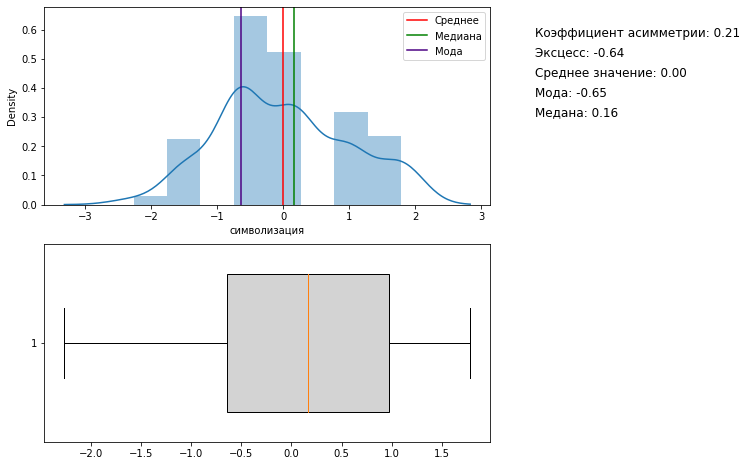

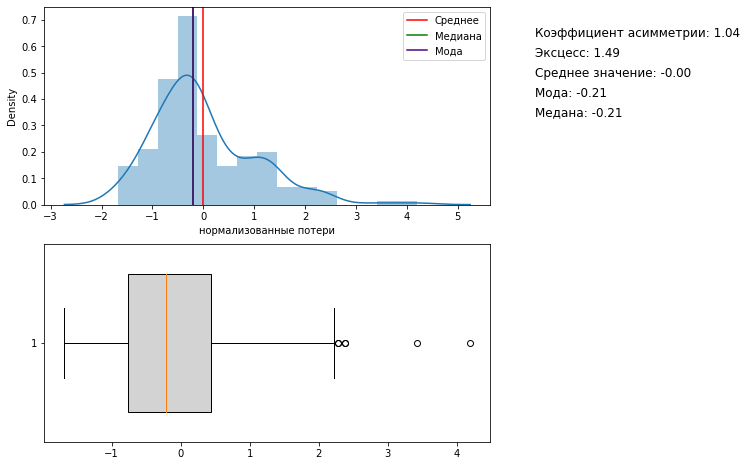

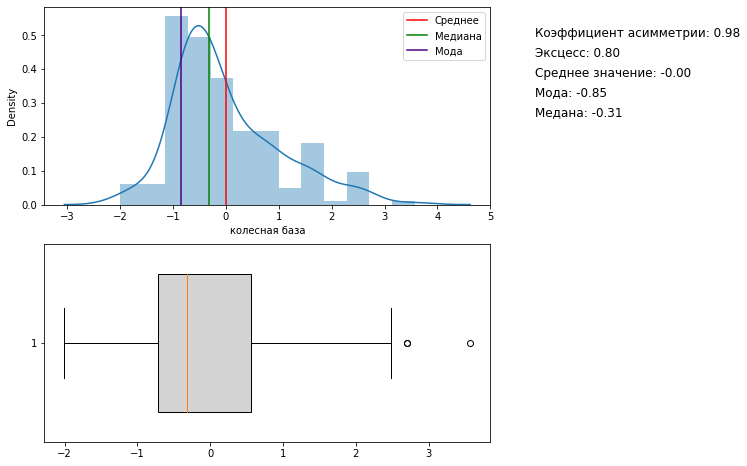

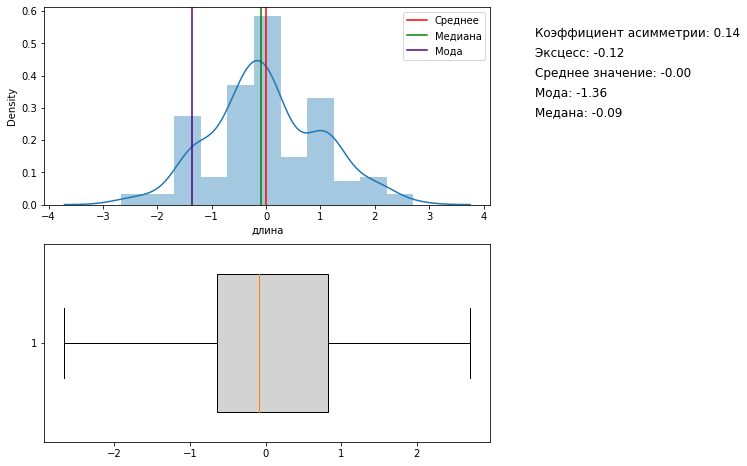

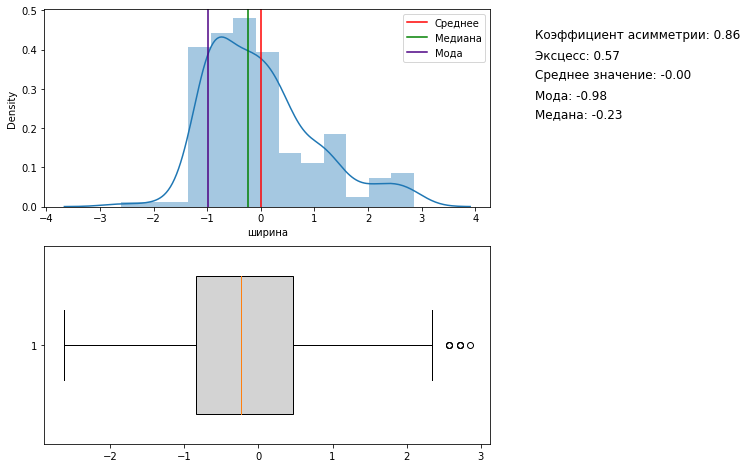

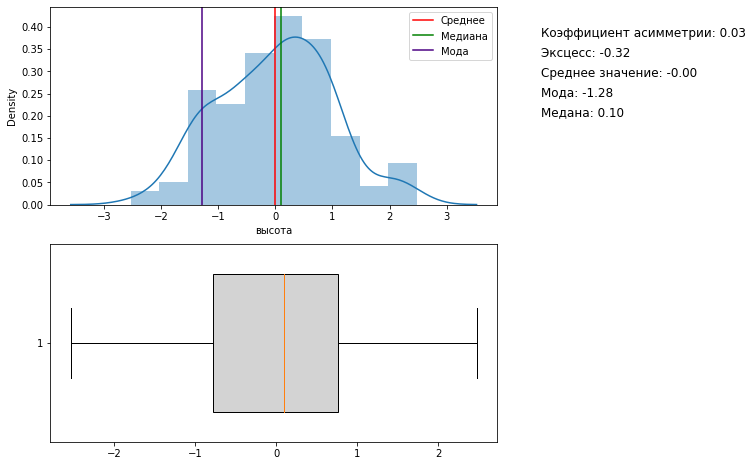

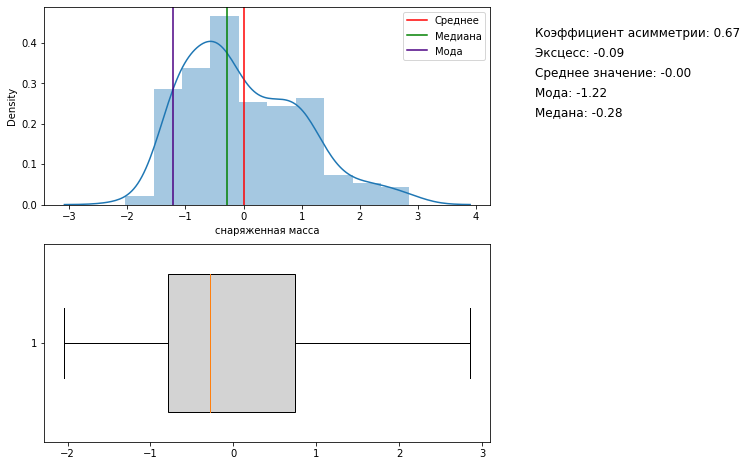

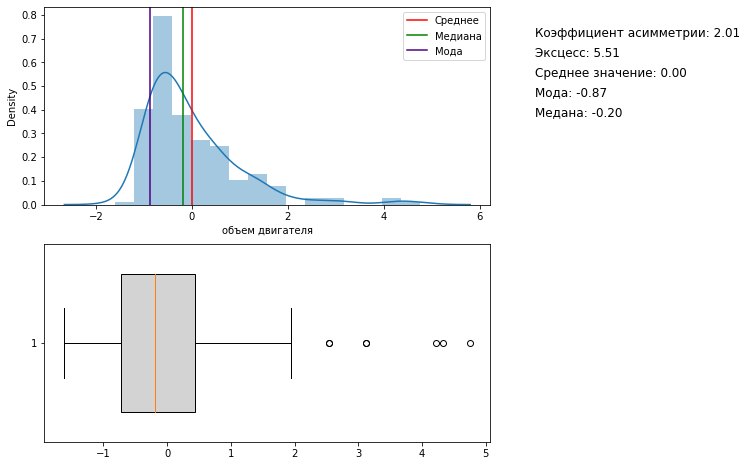

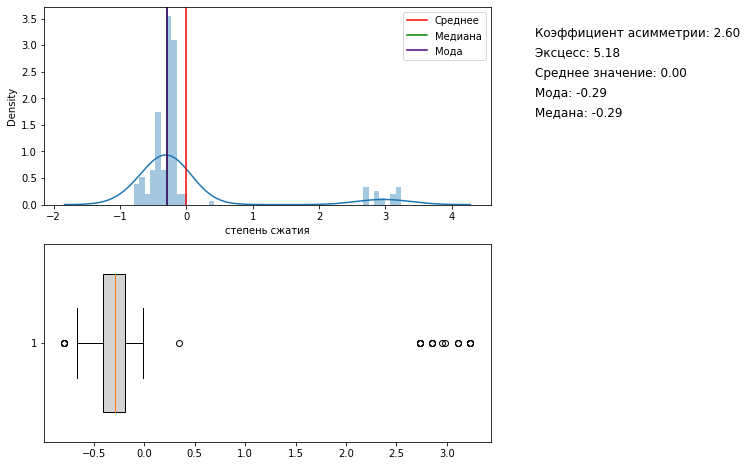

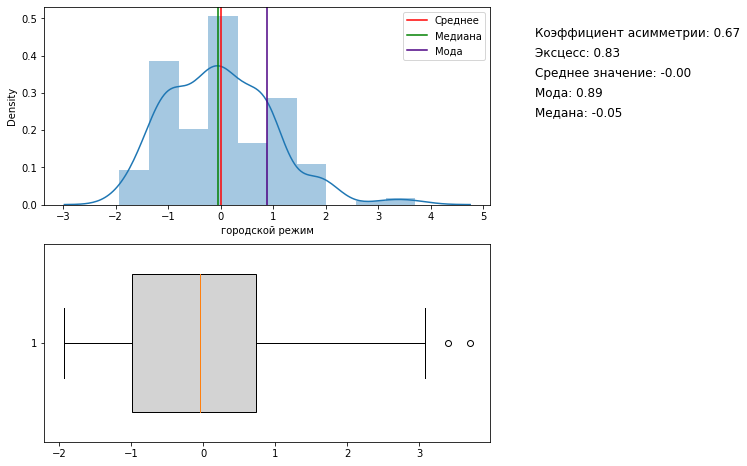

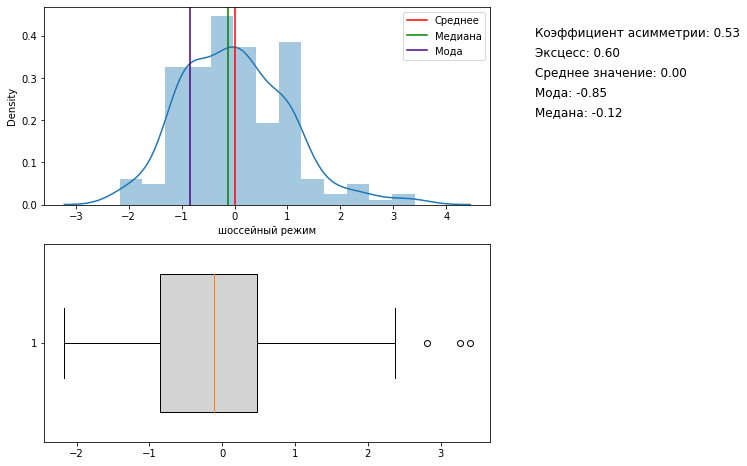

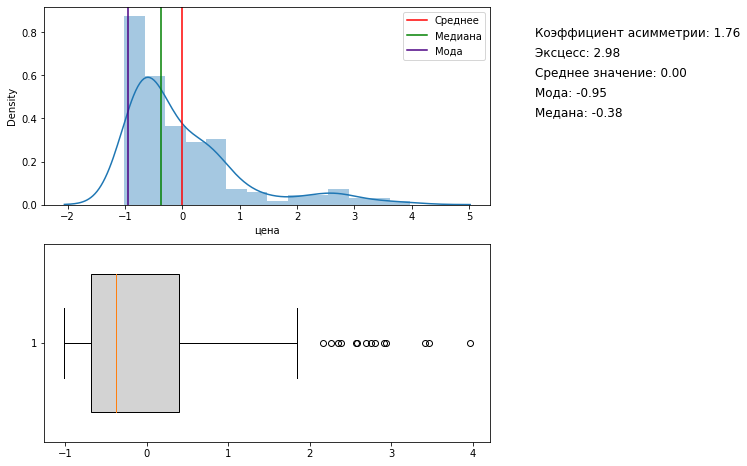

In [445]:
import warnings
warnings.filterwarnings("ignore")
df1 = z_norm(df1)
not_object_col = [c for c in df1.columns if df1[c].dtype != 'object']
for c in not_object_col:
    plott(data = df1,name= c)


### Применим к данным метод межквартильного размаха.

(144, 26)


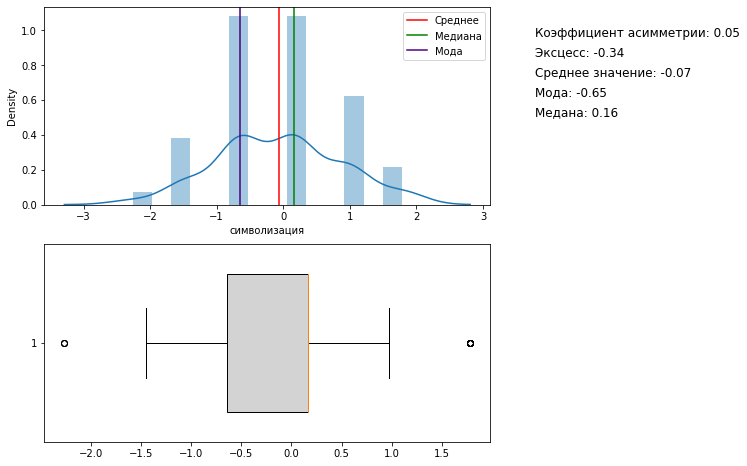

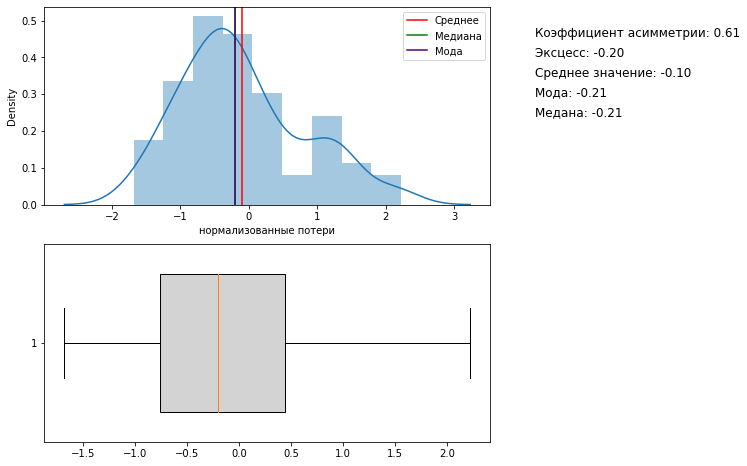

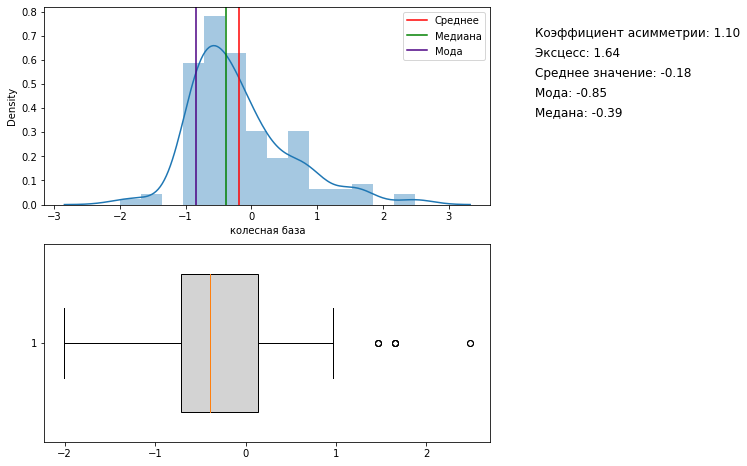

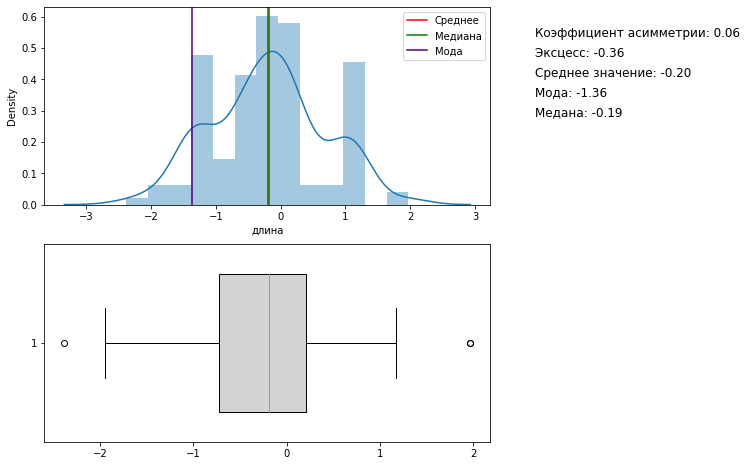

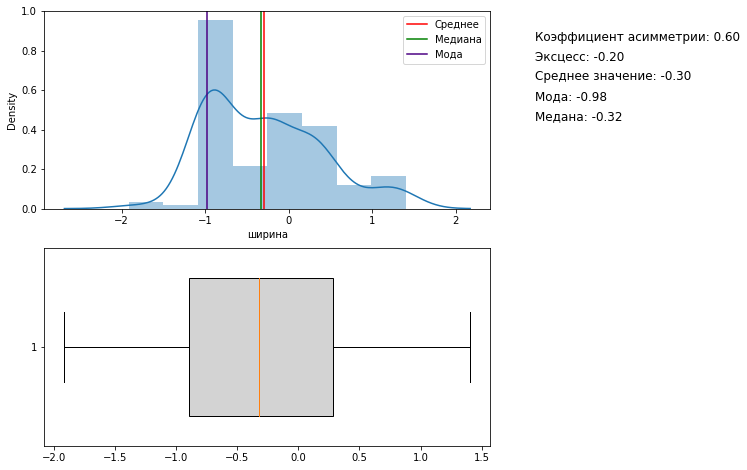

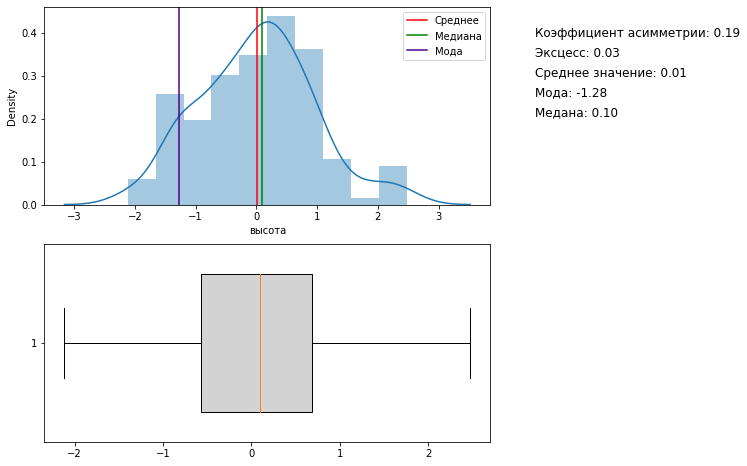

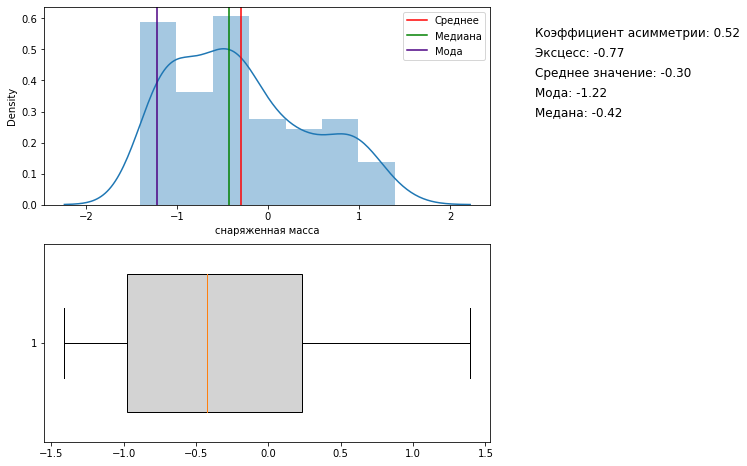

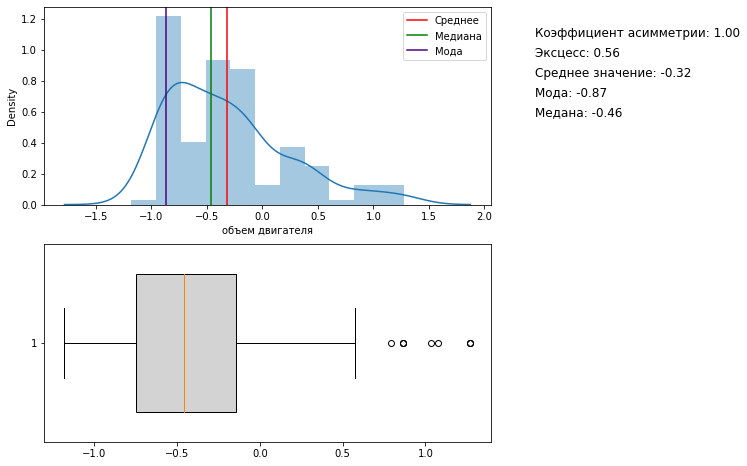

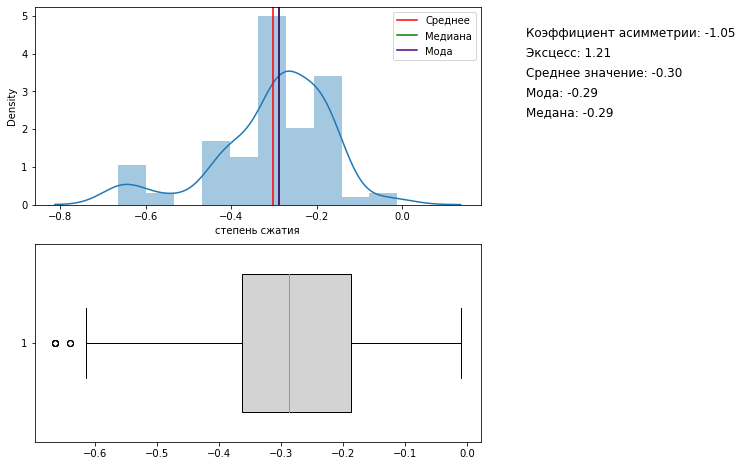

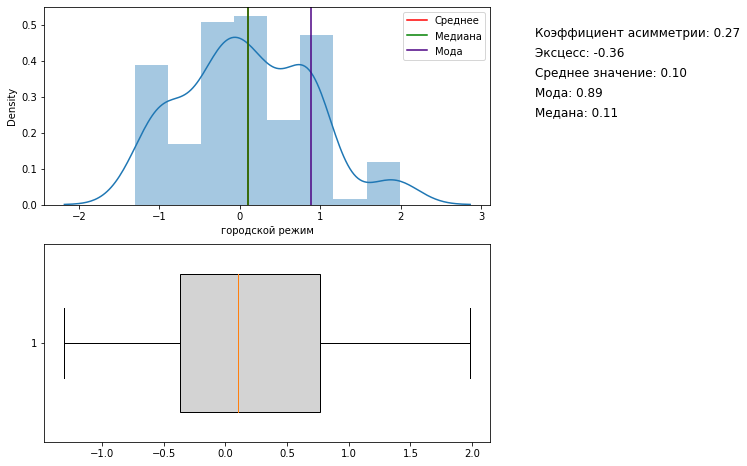

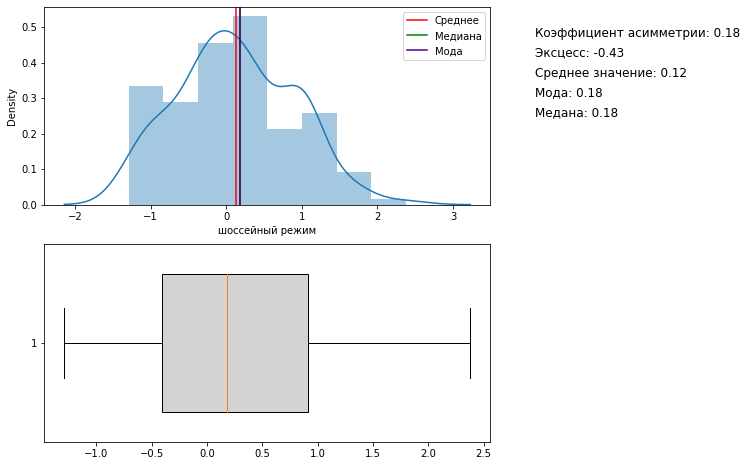

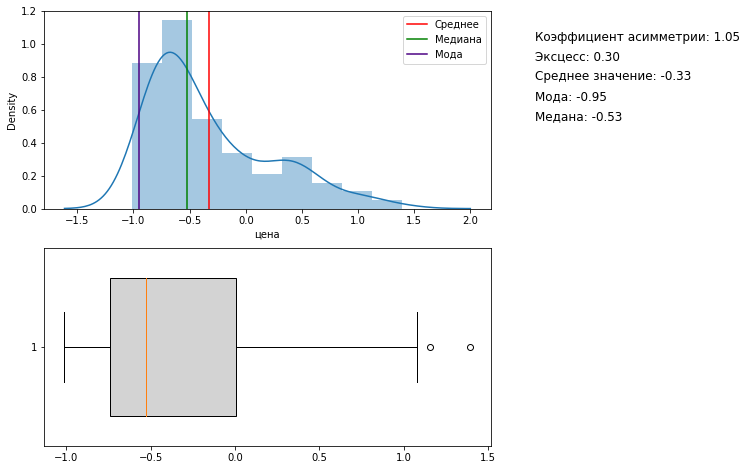

In [446]:
import warnings
warnings.filterwarnings("ignore")
not_object_col = [c for c in df1.columns if df1[c].dtype != 'object']
print(IQR(df1).shape)
for c in not_object_col:
    plott(data = IQR(df1),name = c)


### Применим метод замены выбросов на границы интервалов.(Q1 - 1.5 * IQR и Q3 + 1.5 * IQR)

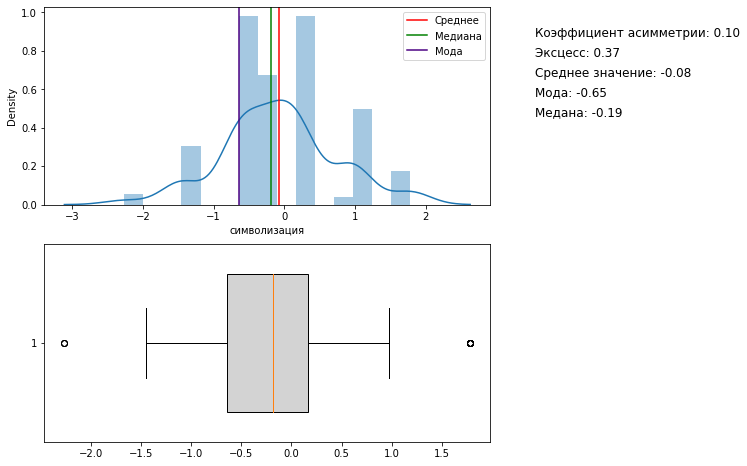

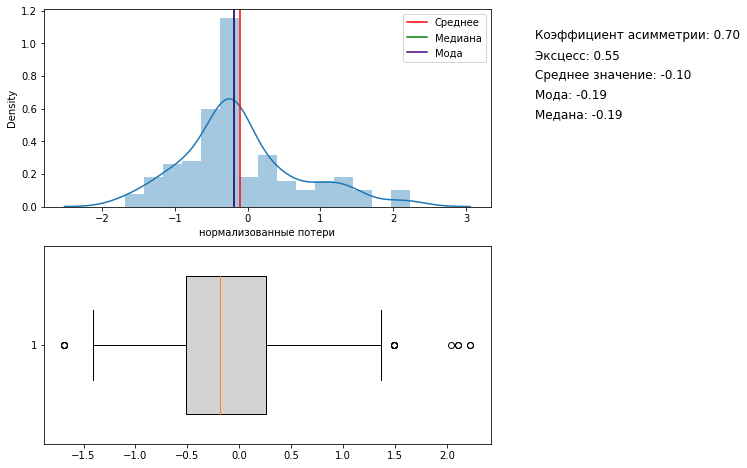

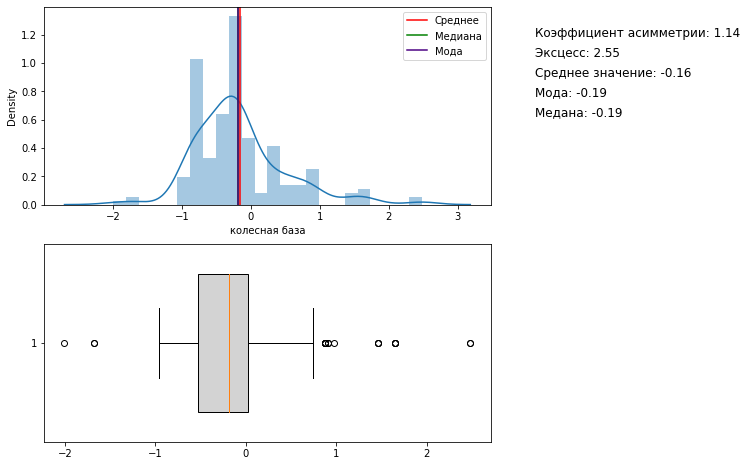

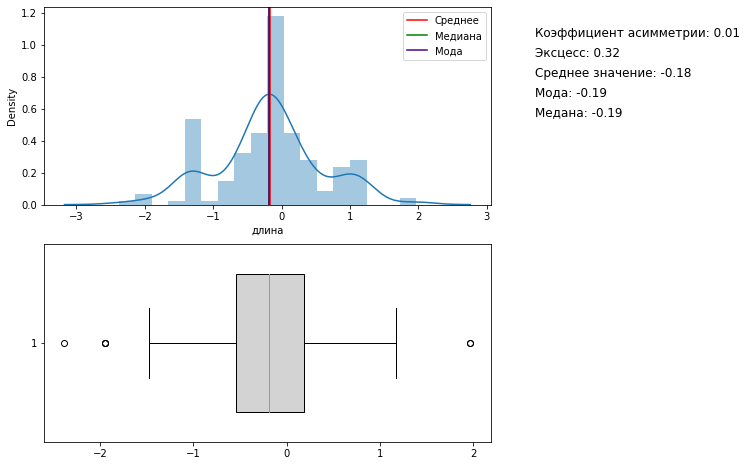

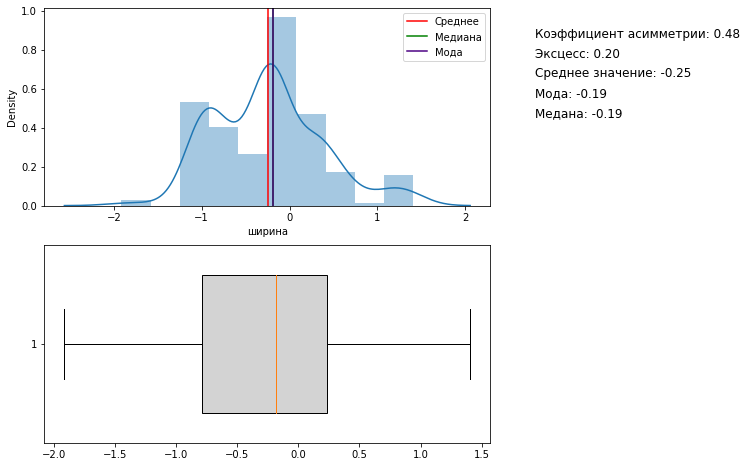

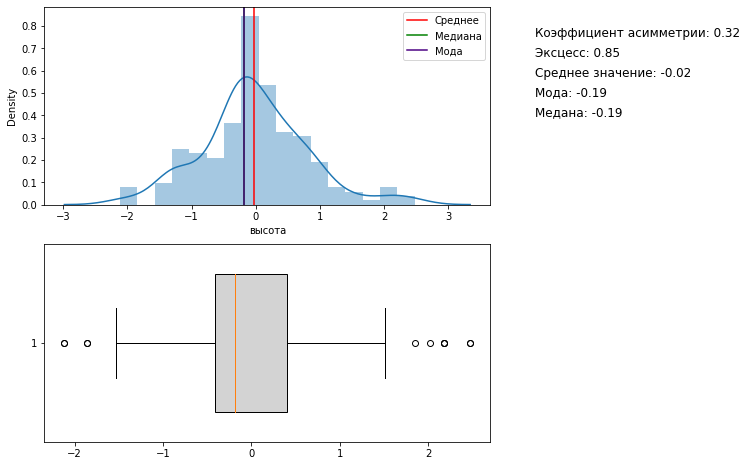

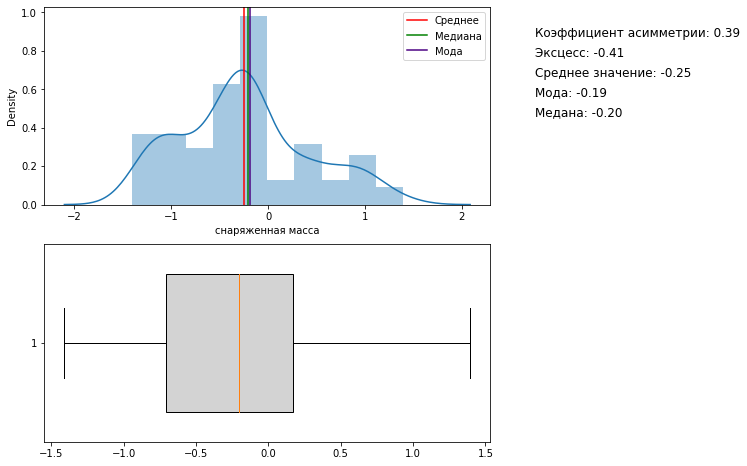

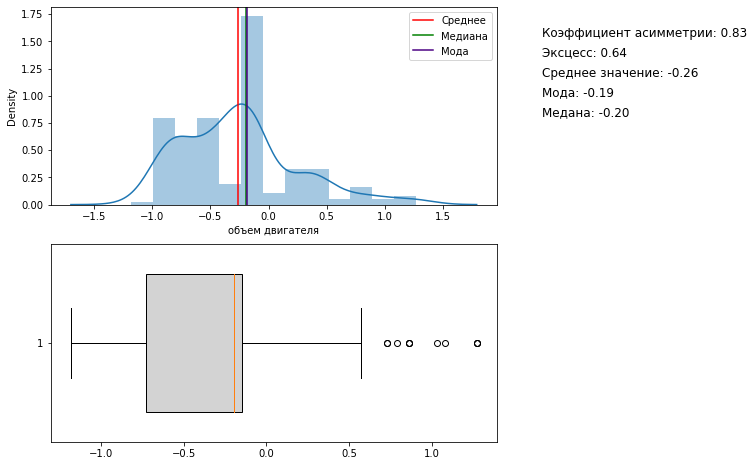

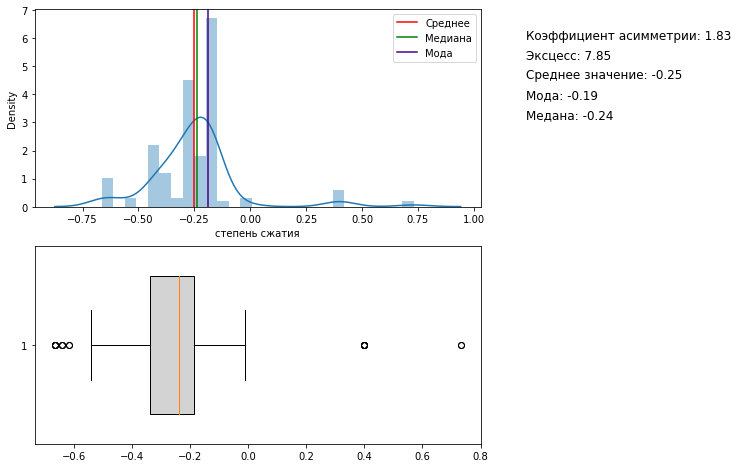

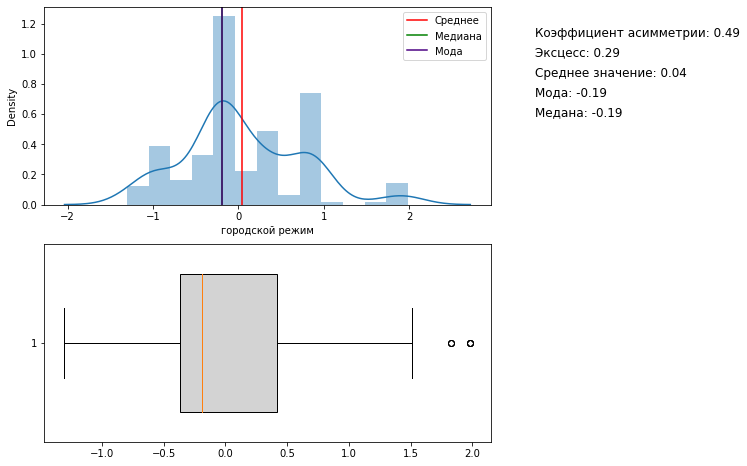

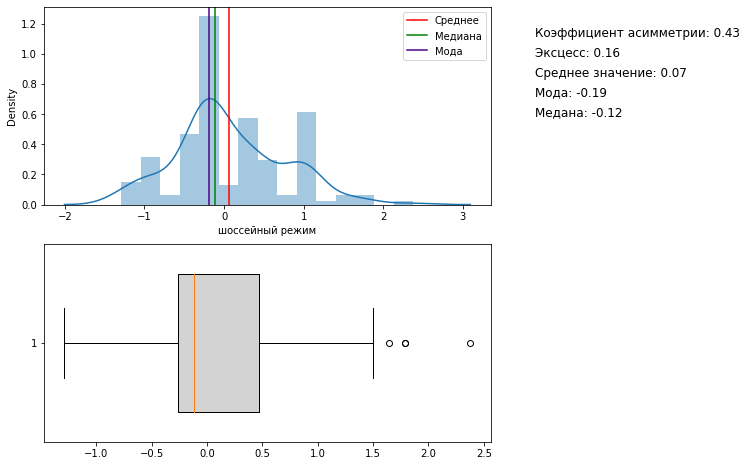

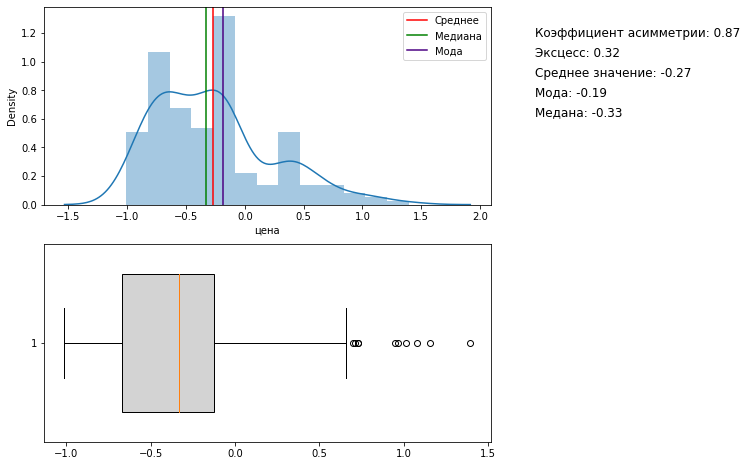

In [447]:
import warnings
warnings.filterwarnings("ignore")
for c in not_object_col:
    plott(data = border(df1),name = c)

### Как можно заметить данный метод сильно исказил данные.Это происходит из-за небольшого числа данных в датасете.Если данных мало, замена выбросов на границы интервала может привести к потере значимых наблюдений и искажению статистического анализа.


### Применим метод доверительных интервалов.


(185, 26)


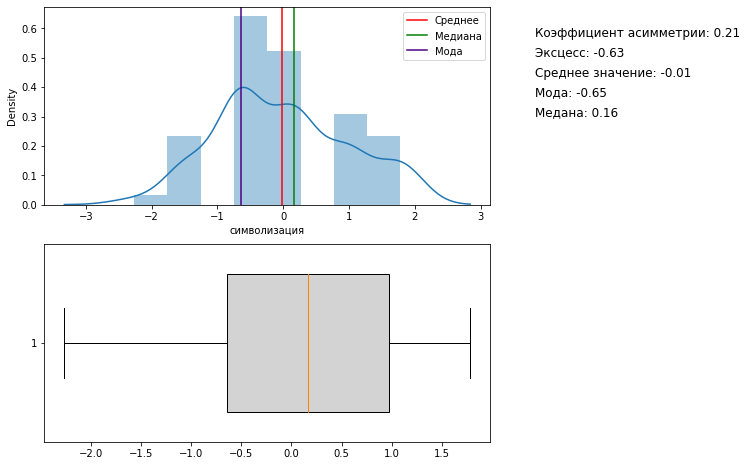

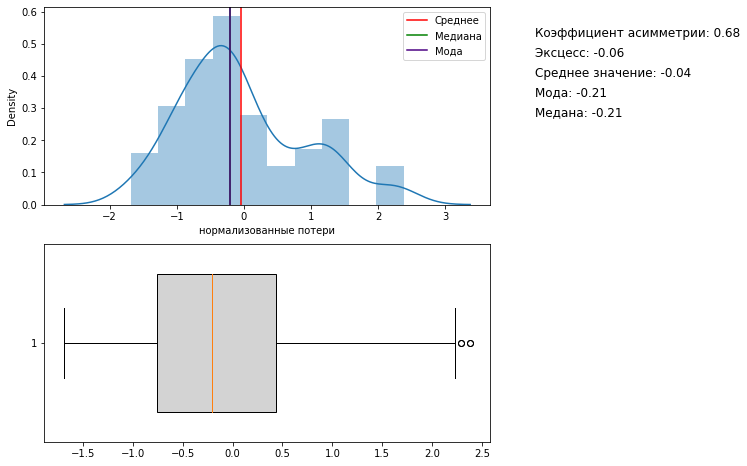

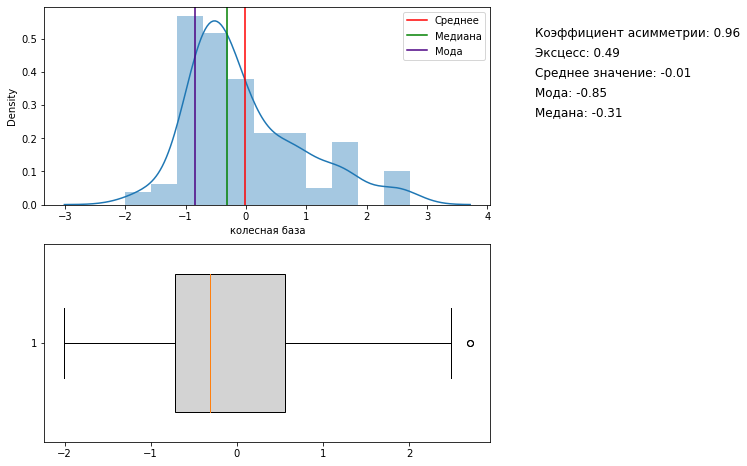

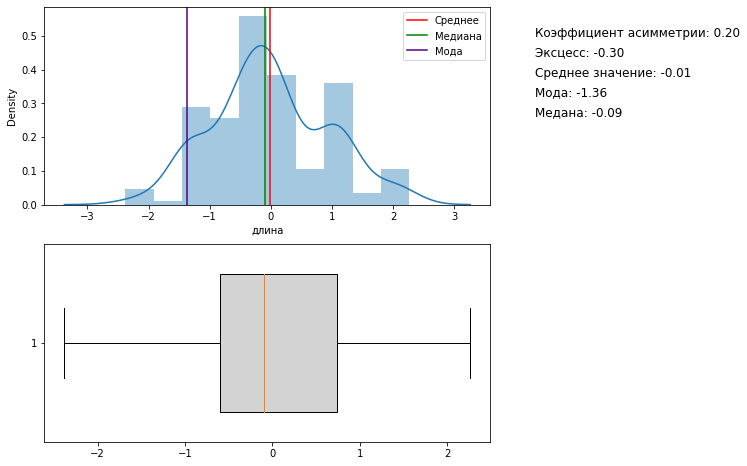

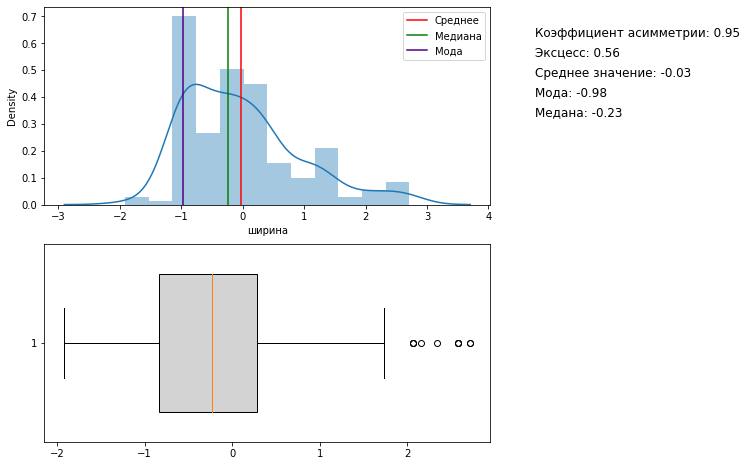

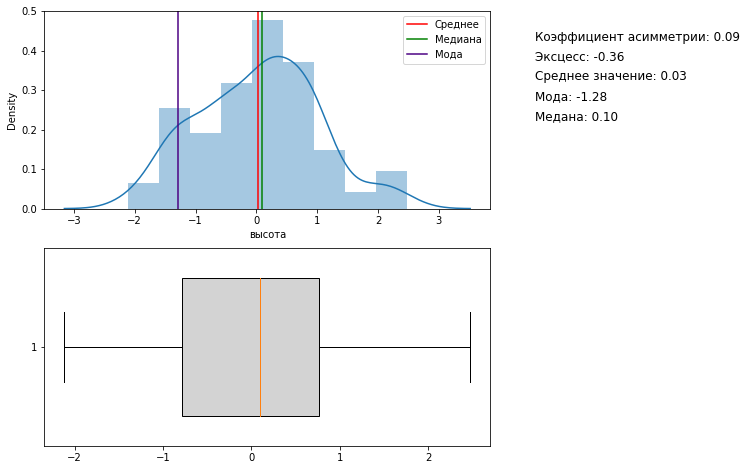

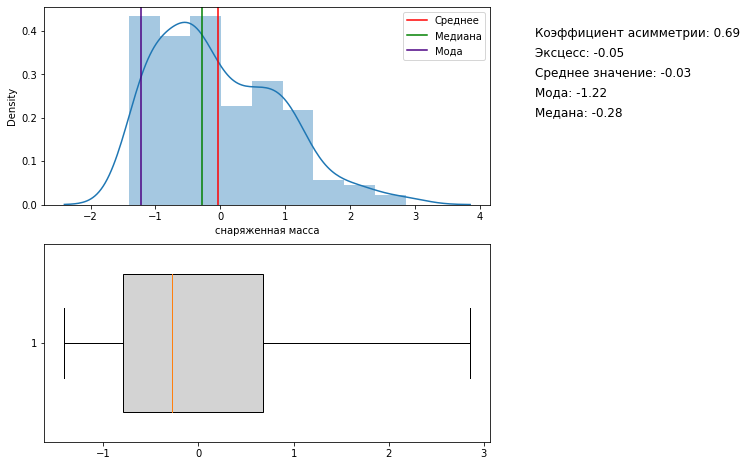

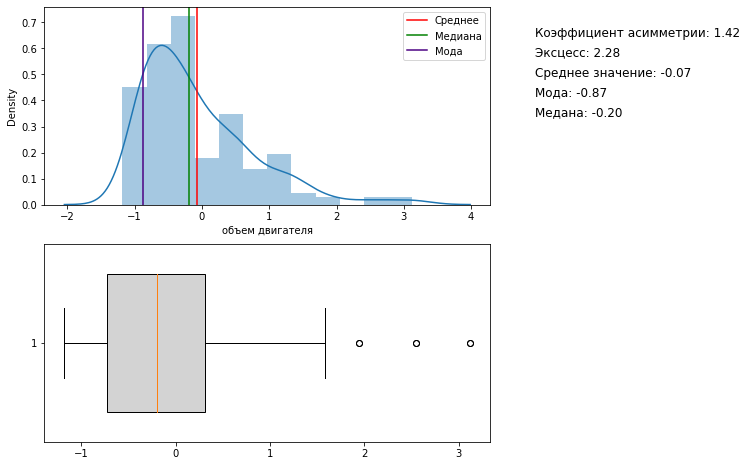

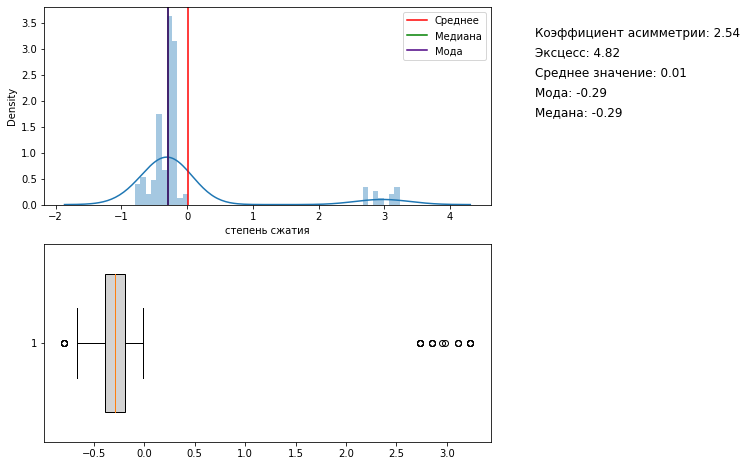

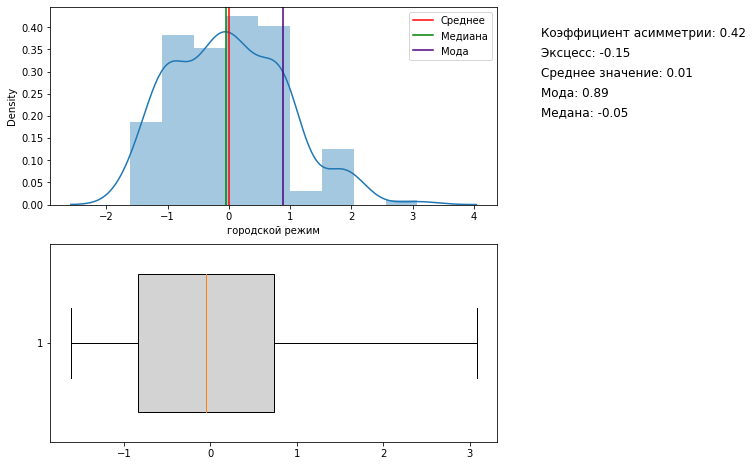

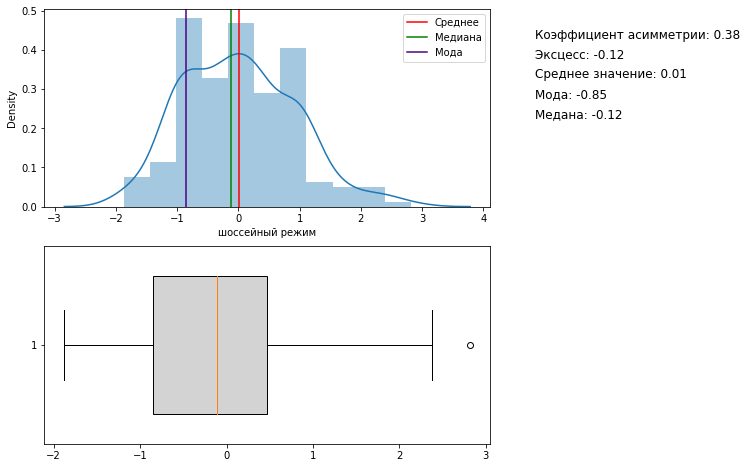

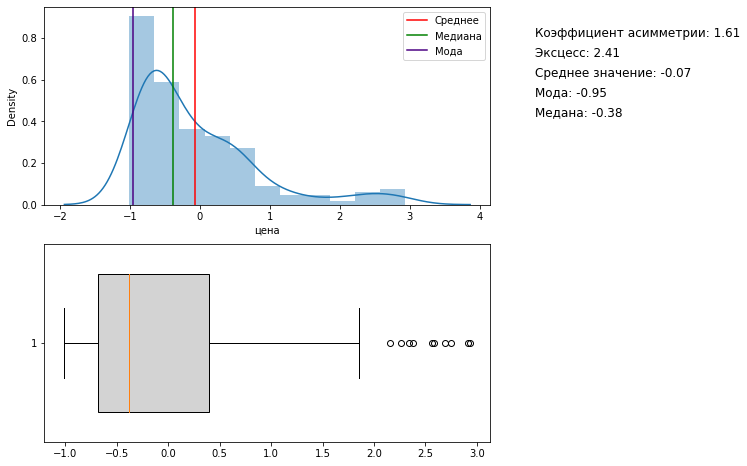

In [448]:
import warnings
warnings.filterwarnings("ignore")
print(trust_intervals(df1).shape)
for c in not_object_col:
    plott(data = trust_intervals(df1),name = c)

### Посомтрим как эти методы повляли на датасет. Через анализ асимметрии и эксцессов.

In [449]:
skewness = np.abs(df1[not_object_col].skew())
kurtosis = np.abs(df1[not_object_col].kurtosis())
skewness_IQR = np.abs(IQR(df1)[not_object_col].skew())
kurtosis_IQR = np.abs(IQR(df1)[not_object_col].kurtosis())
skewness_broad = np.abs(border(df1)[not_object_col].skew())
kurtosis_broad = np.abs(border(df1)[not_object_col].kurtosis())
skewness_trust_int = np.abs(trust_intervals(df1)[not_object_col].skew())
kurtosis_trust_int = np.abs(trust_intervals(df1)[not_object_col].kurtosis())
print('Рез-тат IQR метода:')
print('В %d колонках из 12 коэффциент асимметрии улучшился'%(skewness > skewness_IQR).sum())
print('В %d колонках из 12 коэффциент эксцесса улучшился'%(kurtosis > kurtosis_IQR).sum())
print()
print('Рез-тат метода замены выбросов на граничные значения:')
print('В %d колонках из 12 коэффциент асимметрии улучшился'%(skewness > skewness_broad).sum())
print('В %d колонках из 12 коэффциент эксцесса улучшился'%(kurtosis > kurtosis_broad).sum())
print()
print('Рез-тат метода доверительных интервалов:')
print('В %d колонках из 12 коэффциент асимметрии улучшился'%(skewness > skewness_trust_int).sum())
print('В %d колонках из 12 коэффциент эксцесса улучшился'%(kurtosis > kurtosis_trust_int).sum())
print()
print("Число удаленных эл-тов после IQR метода: %d" % (df1.shape[0]-IQR(df1).shape[0]))
print("Число удаленных эл-тов после метода доверительных интервалов: %d" % (df1.shape[0]-trust_intervals(df1).shape[0]))


Рез-тат IQR метода:
В 10 колонках из 12 коэффциент асимметрии улучшился
В 9 колонках из 12 коэффциент эксцесса улучшился

Рез-тат метода замены выбросов на граничные значения:
В 10 колонках из 12 коэффциент асимметрии улучшился
В 7 колонках из 12 коэффциент эксцесса улучшился

Рез-тат метода доверительных интервалов:
В 7 колонках из 12 коэффциент асимметрии улучшился
В 10 колонках из 12 коэффциент эксцесса улучшился

Число удаленных эл-тов после IQR метода: 49
Число удаленных эл-тов после метода доверительных интервалов: 8


### Качественный анализ результатов показывает, что эти методы примерно одинаково дейсвтую на этот датасет.Однако на графиках видно, что метод замены выбросов граничными значениями приводит к еще более сильным выбросам,при этом IQR метод удаляет больше значений из датасета, что влечет за собой большее искажение изначальных данных => для данного датасета лучшим методом будет метод доверительных интервалов.

In [450]:
def scaling_plot(name,color_,data = df2):
    plt.plot(df2[name], np.full(len(df2),i), ls="", marker="o", ms=10, color=color_, label=name)
    plt.axvline(df2[name].mean(), ls="--", color = color_ , label="mean of " + str(name))
    plt.legend()
    plt.show()

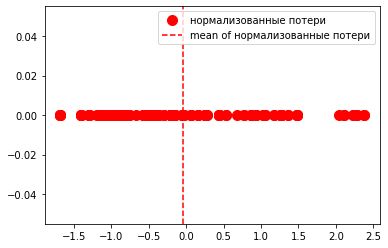

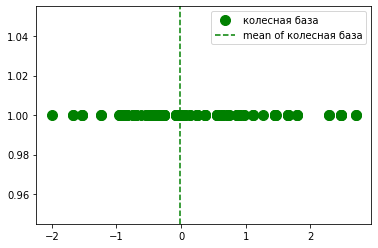

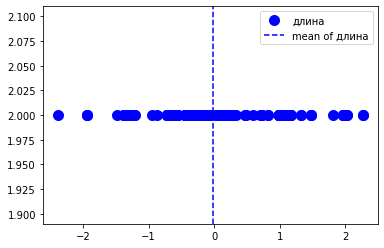

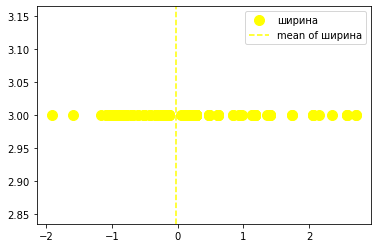

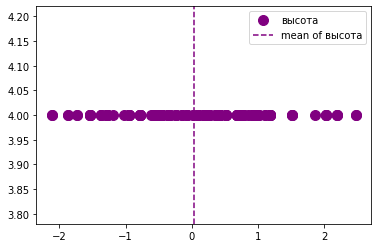

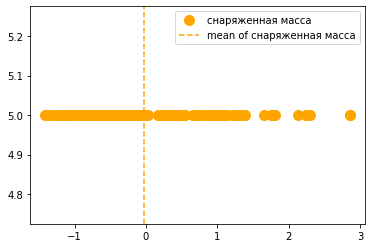

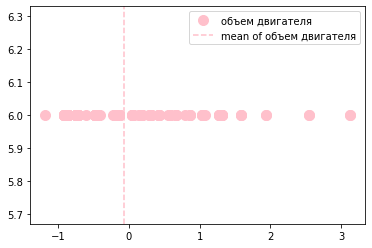

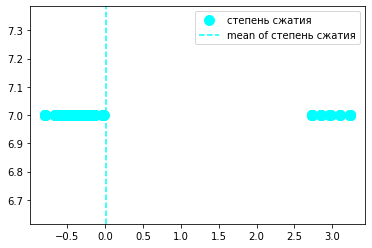

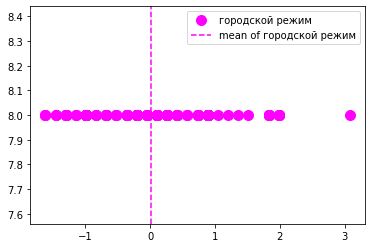

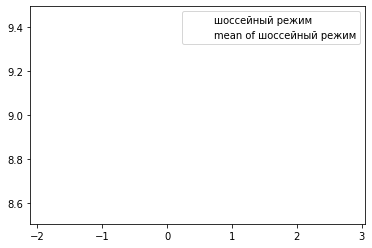

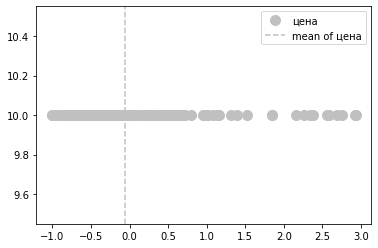

In [451]:
df2 = trust_intervals(df1).copy(deep = True)

colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'cyan', 'magenta', 'white', 'silver', 'gold', 'brown', 'teal', 'lavender', 'indigo', 'turquoise', 'coral', 'maroon', 'lime']
i = 0
for c in not_object_col[1:]:
    scaling_plot(name = c,color_ = colors[i])
    i += 1


### нормальные потери(красный),длина(синий),ширина(желтый),выота(пурпурный),городской режим(фиолетовый) не сильно разбросан относительно среднего зн-я.Таким образом дисперсия этих величин будет не большой.
### колесная база(зеленый),снаряженная масса(оранжевый),объем двигателя(розовый),степень сжатия(голубой),цена(серый) разбросаны сильней относительно среднего значения.То есть дисперсия у этих величин будет больше чем у предыдущих.

In [452]:
df2.describe()

,символизация,нормализованные потери,колесная база,длина,ширина,высота,снаряженная масса,объем двигателя,степень сжатия,городской режим,шоссейный режим,цена
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,-0.011447,-0.039830,-0.013802,-0.012167,-0.028192,0.027672,-0.030931,-0.073432,0.012298,0.005595,0.011339,-0.065089
std,1.004343,0.938072,0.951052,0.941050,0.936021,0.983026,0.940729,0.816976,1.018007,0.913605,0.914291,0.877157
min,-2.264462,-1.683590,-2.003091,-2.382194,-1.914955,-2.117092,-1.409736,-1.181145,-0.790354,-1.616578,-1.875859,-1.009636
25%,-0.645791,-0.760223,-0.719041,-0.603147,-0.839080,-0.780847,-0.790787,-0.724309,-0.388091,-0.833840,-0.849001,-0.685742
50%,0.163544,-0.206203,-0.312696,-0.090269,-0.230977,0.096064,-0.280060,-0.195342,-0.287525,-0.051101,-0.115531,-0.381629
75%,0.972880,0.440154,0.565009,0.735145,0.283571,0.764187,0.682537,0.309582,-0.186959,0.731638,0.471245,0.397446
max,1.782215,2.379225,2.710510,2.265766,2.715984,2.476251,2.856450,3.122727,3.232282,3.079853,2.818350,2.935187


In [453]:
df2.describe(include = 'object')


,марка,вид топлива,стремление,количество дверей,тип кузова,ведущий мост,расположение двигателя,тип двигателя,количество цилиндров,топливная система,диаметр отверстия,ход,мощность двигателя,пиковые обороты
count,185,185,185,185,185,185,185,185,185,185,185,185,185,185
unique,21,2,2,2,5,3,2,5,4,7,37,35,52,21
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,4800
freq,32,166,150,111,89,111,182,138,151,82,22,18,19,35


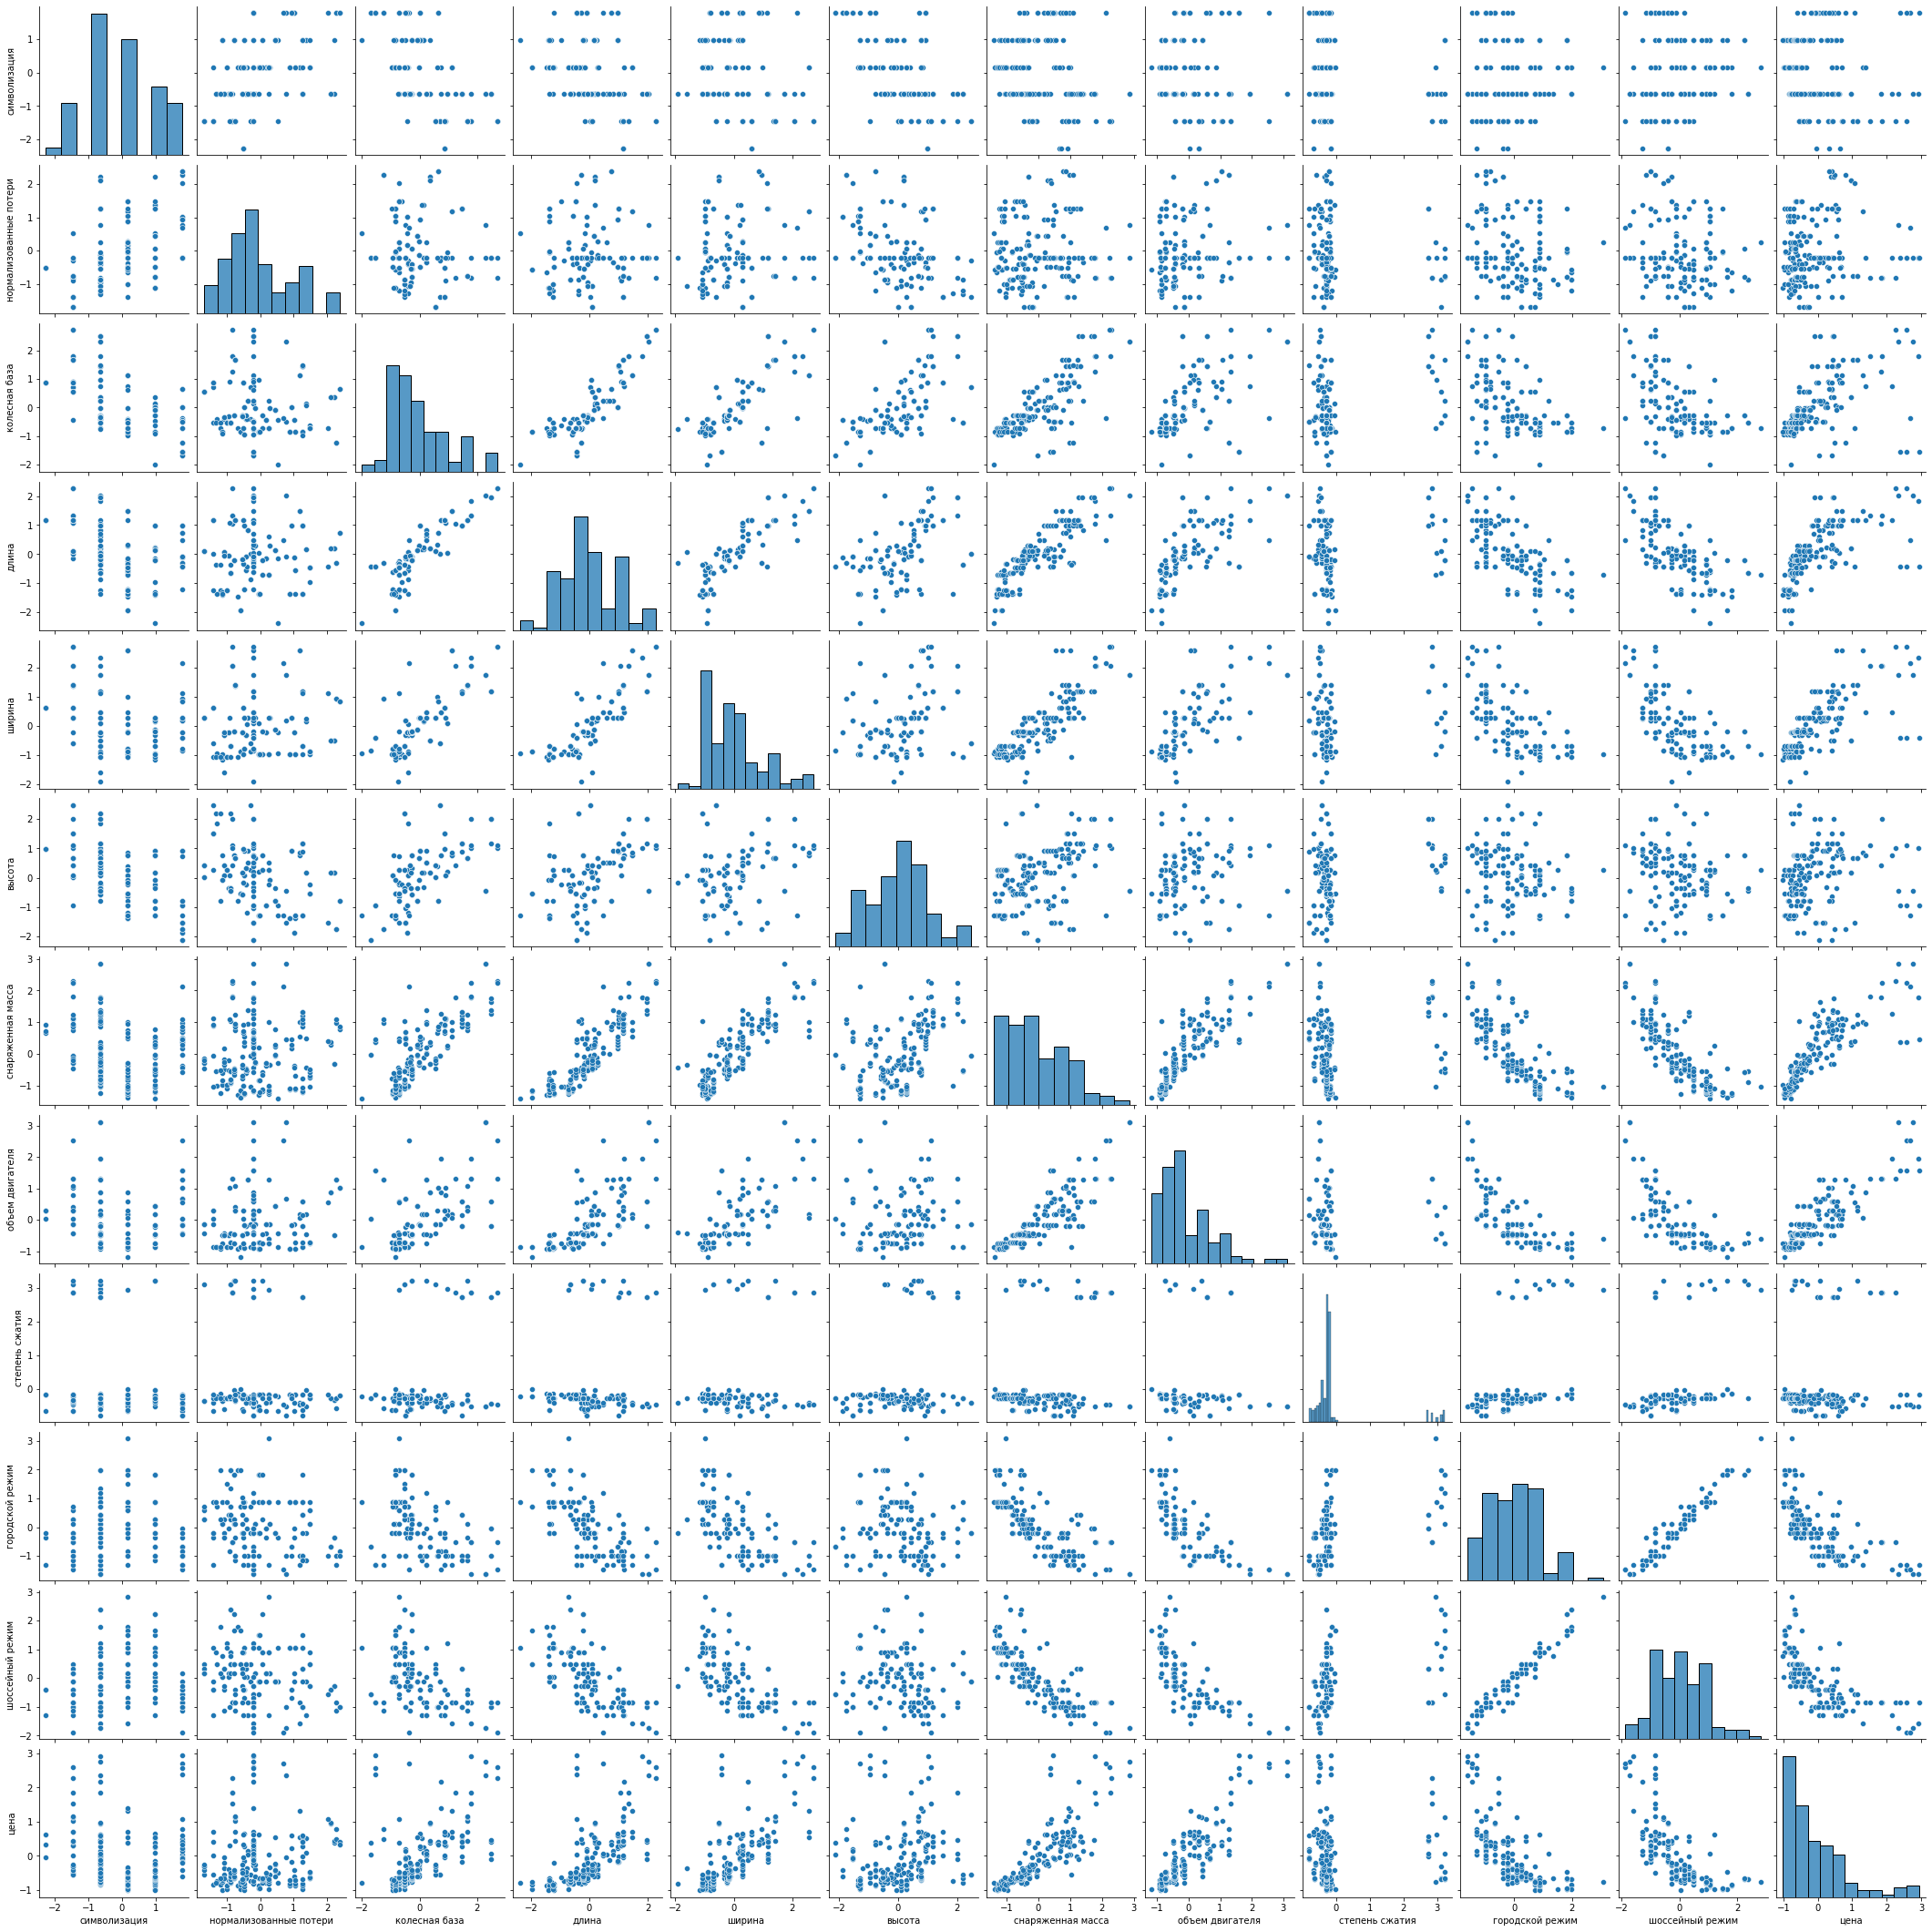

In [454]:

sns.pairplot(df2,vars=not_object_col)
plt.show()

# Дальше тесты и анализ

In [455]:
from scipy.stats import shapiro
stat, p = shapiro(df2['объем двигателя'])
print(stat, p)
alpha = 0.05
if p > alpha:
	print('Образец имеет гауссово распределение (принимаем гипотезу H0), p = %.3f' % p)
else:
	print('Образец не имеет гауссово распределение (отвергаем гипотезу H0), p = %.3f' % p)

0.8666921257972717 1.0612092801731698e-11
Образец не имеет гауссово распределение (отвергаем гипотезу H0), p = 0.000


**Тест д'Агостино на K^2**

In [456]:
from scipy.stats import normaltest
stat, p = normaltest(df2['объем двигателя'])
print(stat, p)
alpha = 0.05
if p > alpha:
	print('Образец имеет гауссово распределение (принимаем гипотезу H0), p = %.3f' % p)
else:
	print('Образец не имеет гауссово распределение (отвергаем гипотезу H0), p = %.3f' % p)

53.01812272381132 3.070866452988498e-12
Образец не имеет гауссово распределение (отвергаем гипотезу H0), p = 0.000


**Тест Андерсона-Дарлинга**

In [457]:
from scipy.stats import anderson
p = anderson(df2['объем двигателя'])
print(p)

AndersonResult(statistic=6.674302752802475, critical_values=array([0.564, 0.643, 0.771, 0.899, 1.07 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.07343228811087432, scale=0.8169764708969476)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


**Коэффициент корреляции Пирсона**

Демонстрирует наличие линейной корреляции в выборке с нормальным распределением.
Корреляция Пирсона часто обозначается переменной r и вычисляется следующим образом:
r = cov(X,Y)/(std(x)*std(y))

In [458]:
from scipy.stats import pearsonr
data1, data2 = np.array(df2['объем двигателя']), np.array(df2['снаряженная масса'])
corr, p = pearsonr(data1, data2)
print(corr, p)
alpha = 0.05
if p > alpha:
	print('Два образца независимы (принимаем гипотезу H0), p = %.3f' % p)
else:
	print('Существует зависимость между образцами (отвергаем гипотезу H0), p = %.3f' % p)

0.862460420288184 5.160317972346108e-56
Существует зависимость между образцами (отвергаем гипотезу H0), p = 0.000


In [459]:
from scipy.stats import pearsonr
data3 = np.array(df2['символизация'])
corr, p = pearsonr(data1, data3)
print(corr, p)
alpha = 0.05
if p > alpha:
	print('Два образца независимы (принимаем гипотезу H0), p = %.3f' % p)
else:
	print('Существует зависимость между образцами (отвергаем гипотезу H0), p = %.3f' % p)

-0.025287175721100487 0.7326020906908612
Два образца независимы (принимаем гипотезу H0), p = 0.733


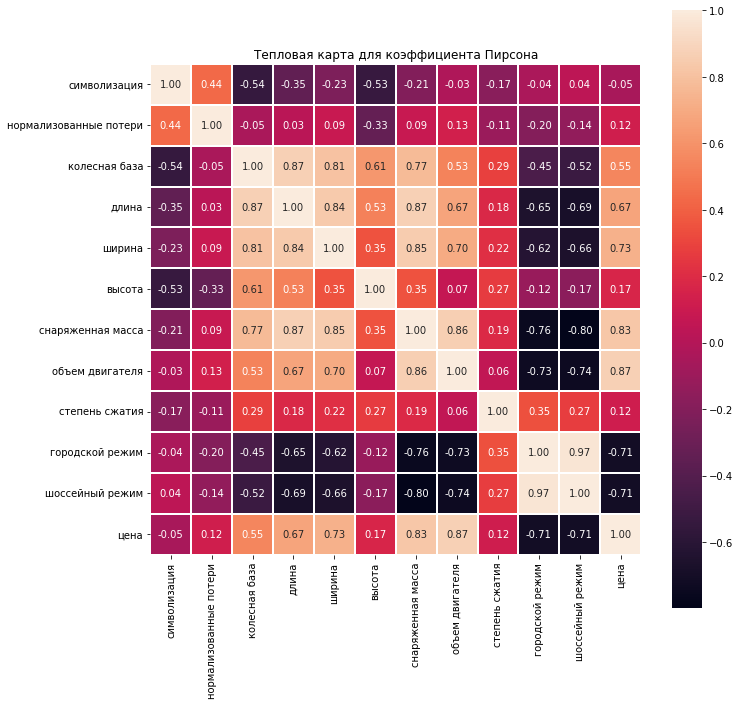

In [460]:
plt.figure(figsize = (11, 11))
ax = sns.heatmap(df2.corr(), vmax = 1, square = True, fmt = '.2f', annot = True, linecolor = 'white', linewidths = 0.05)
plt.title('Тепловая карта для коэффициента Пирсона')
plt.show()

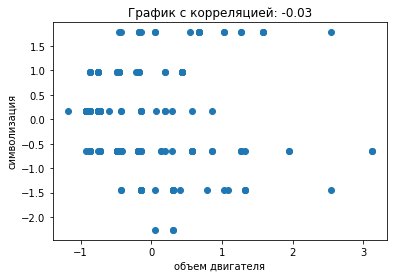

In [461]:
plt.scatter(data1, data3)
plt.xlabel('объем двигателя')
plt.ylabel('символизация')
plt.title('График с корреляцией: {:.2f}'.format(corr))
plt.show()

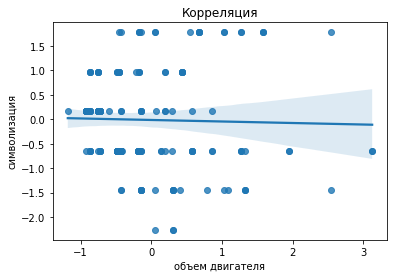

In [462]:
sns.regplot(x=data1, y=data3)
plt.title("Корреляция")
plt.xlabel('объем двигателя')
plt.ylabel('символизация')
plt.show()

### Ранговая корреляция Спирмена 
### Проверяет, имеют ли два образца монотонные отношения.

In [463]:
from scipy.stats import spearmanr
coef, p = spearmanr(df2['объем двигателя'], df2['символизация'])
print('Коэффициент корреляции Спирмана: %.2f' % coef)
alpha = 0.05
if p > alpha:
	print('Два образца независимы (принимаем гипотезу H0), p = %.3f' % p)
else:
	print('Существует зависимость между образцами (отвергаем гипотезу H0), p = %.3f' % p)

Коэффициент корреляции Спирмана: -0.12
Два образца независимы (принимаем гипотезу H0), p = 0.119


In [464]:
coef, p = spearmanr(df2['объем двигателя'], df2['снаряженная масса'])
print('Коэффициент корреляции Спирмана: %.2f' % coef)
alpha = 0.05
if p > alpha:
	print('Два образца независимы (принимаем гипотезу H0), p = %.3f' % p)
else:
	print('Существует зависимость между образцами (отвергаем гипотезу H0), p = %.3f' % p)

Коэффициент корреляции Спирмана: 0.89
Существует зависимость между образцами (отвергаем гипотезу H0), p = 0.000


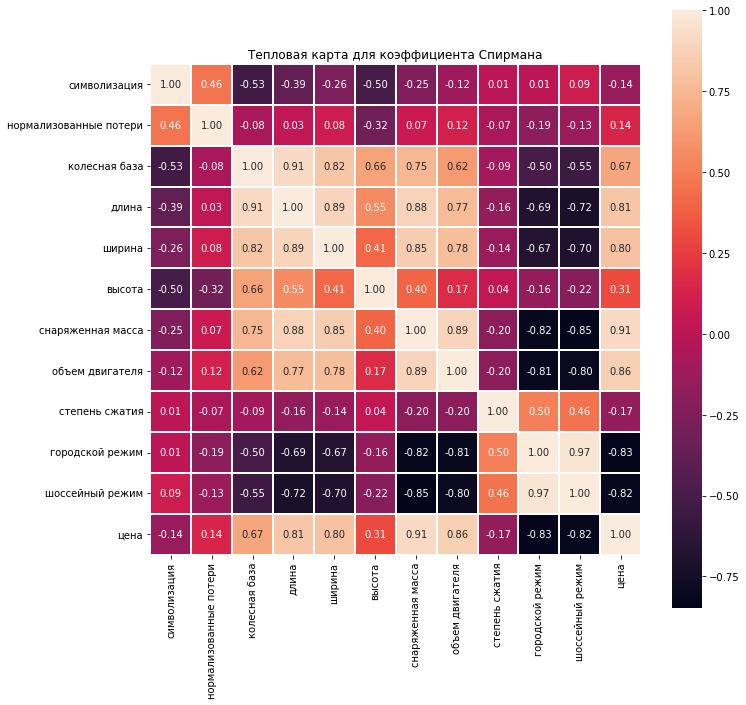

In [465]:
plt.figure(figsize = (11, 11))
ax = sns.heatmap(df2.corr(method = 'spearman'), vmax = 1, square = True, fmt = '.2f', annot = True, linecolor = 'white', linewidths = 0.05)
plt.title('Тепловая карта для коэффициента Спирмана')
plt.show()

**Ранговая корреляция Кендалла**

In [466]:
from scipy.stats import kendalltau
coef, p = kendalltau(df2['объем двигателя'], df2['снаряженная масса'])
print('Коэффициент корреляции Кендалла: %.2f' % coef)
alpha = 0.05
if p > alpha:
	print('Два образца независимы (принимаем гипотезу H0), p = %.3f' % p)
else:
	print('Существует зависимость между образцами (отвергаем гипотезу H0), p = %.3f' % p)

Коэффициент корреляции Кендалла: 0.73
Существует зависимость между образцами (отвергаем гипотезу H0), p = 0.000


In [467]:
from scipy.stats import kendalltau
coef, p = kendalltau(df2['объем двигателя'], df2['символизация'])
print('Коэффициент корреляции Кендалла: %.2f' % coef)
alpha = 0.05
if p > alpha:
	print('Два образца независимы (принимаем гипотезу H0), p = %.3f' % p)
else:
	print('Существует зависимость между образцами (отвергаем гипотезу H0), p = %.3f' % p)

Коэффициент корреляции Кендалла: -0.09
Два образца независимы (принимаем гипотезу H0), p = 0.096


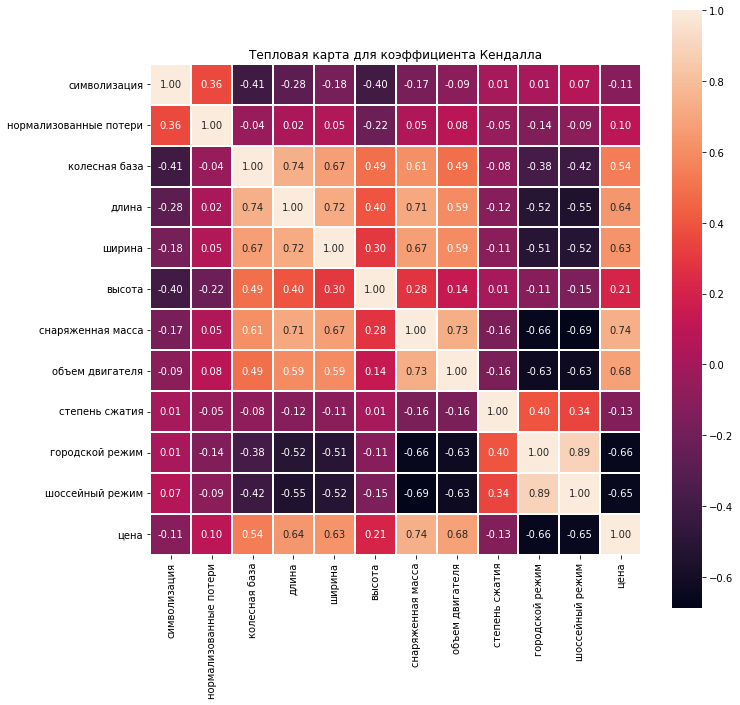

In [468]:
plt.figure(figsize = (11, 11))
ax = sns.heatmap(df2.corr(method = 'kendall'), vmax = 1, square = True, fmt = '.2f', annot = True, linecolor = 'white', linewidths = 0.05)
plt.title('Тепловая карта для коэффициента Кендалла')
plt.show()

**Тест хи-квадрат**

Проверяет, являются ли две категориальные переменные связанными или независимыми.

In [469]:
from scipy.stats import chi2_contingency
arr = pd.crosstab(df2['объем двигателя'], df2['снаряженная масса'], margins = True)
stat, p, dof, expected = chi2_contingency(arr)
alpha = 0.05
if p > alpha:
    print ('Два образца независимы (принимаем гипотезу H0), p = %.3f' % p)
else :
    print ('Существует зависимость между образцами (отвергаем гипотезу H0), p = %.3f' % p)

Существует зависимость между образцами (отвергаем гипотезу H0), p = 0.000


**Студенческий т-тест**

In [470]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(df2['объем двигателя'], df2['снаряженная масса'])
print(p)
alpha = 0.05
if p > alpha:
    print ('Средства образцов равны (принимаем гипотезу H0), p = %.3f' % p)
else :
    print ('Средства образцов не равны (отвергаем гипотезу H0), p = %.3f' % p)

0.6429516055218099
Средства образцов равны (принимаем гипотезу H0), p = 0.643


**Парный студенческий т-тест**

Проверяет, значительно ли отличаются два парных образца.

In [471]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(df2['объем двигателя'], df2['снаряженная масса'])
print(p)
alpha = 0.05
if p > alpha:
    print ('Средства образцов равны (принимаем гипотезу H0), p = %.3f' % p)
else :
    print ('Средства образцов не равны (отвергаем гипотезу H0), p = %.3f' % p)

0.22628945294879865
Средства образцов равны (принимаем гипотезу H0), p = 0.226


**Анализ дисперсионного теста (ANOVA)**

Проверяет, значительно ли отличаются два или более независимых образца.

In [472]:
from scipy.stats import f_oneway
stat, p = f_oneway(df2['объем двигателя'], df2['снаряженная масса'])
print(p)
alpha = 0.05
if p > alpha:
    print ('Средства образцов равны (принимаем гипотезу H0), p = %.3f' % p)
else :
    print ('Средства образцов не равны (отвергаем гипотезу H0), p = %.3f' % p)

0.6429516055218499
Средства образцов равны (принимаем гипотезу H0), p = 0.643


**Повторные измерения ANOVA Test**

Проверяет, значительно ли отличаются два или более парных образца. (нет реализации на Python)

**Непараметрические статистические проверки гипотез U-тест Манна-Уитни**

Проверяет, равны ли распределения двух независимых выборок или нет.

In [473]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df2['объем двигателя'], df2['снаряженная масса'])
print(p)
alpha = 0.05
if p > alpha:
    print ('Распределения обоих образцов равны (принимаем гипотезу H0), p = %.3f' % p)
else :
    print ('Распределения образцов не равны (отвергаем гипотезу H0), p = %.3f' % p)

0.9674255587069345
Распределения обоих образцов равны (принимаем гипотезу H0), p = 0.967


**Тест Уилкоксона со знаком**

Проверяет, равны ли распределения двух парных выборок или нет.

In [474]:
from scipy.stats import wilcoxon
stat, p = wilcoxon(df2['объем двигателя'], df2['снаряженная масса'])
print(p)
alpha = 0.05
if p > alpha:
    print ('Распределения обоих образцов равны (принимаем гипотезу H0), p = %.3f' % p)
else :
    print ('Распределения образцов не равны (отвергаем гипотезу H0), p = %.3f' % p)

0.683339808017355
Распределения обоих образцов равны (принимаем гипотезу H0), p = 0.683


**Kruskal-Wallis H Test**

Проверяет, являются ли распределения двух или более независимых выборок равными или нет

In [475]:
from scipy.stats import kruskal
stat, p = kruskal(df2['объем двигателя'], df2['снаряженная масса'], df2['символизация'])
print(p)
alpha = 0.05
if p > alpha:
    print ('Распределения всех образцов равны (принимаем гипотезу H0), p = %.3f' % p)
else :
    print ('Распределения образцов не равны (отвергаем гипотезу H0), p = %.3f' % p)

0.7527358187396642
Распределения всех образцов равны (принимаем гипотезу H0), p = 0.753


**Тест Фридмана**

Проверяет, равны ли распределения двух или более парных выборок или нет.

In [476]:
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(df2['объем двигателя'], df2['снаряженная масса'], df2['символизация'])
print(p)
alpha = 0.05
if p > alpha:
    print ('Распределения всех образцов равны (принимаем гипотезу H0), p = %.3f' % p)
else :
    print ('Распределения образцов не равны (отвергаем гипотезу H0), p = %.3f' % p)

0.020296693310774813
Распределения образцов не равны (отвергаем гипотезу H0), p = 0.020


In [477]:
def slope(xs, ys):
#Вычисление наклона линии (углового коэффициента)
    return xs.cov(ys) / xs.var()

def intercept(xs, ys): 
#Вычисление точки пересечения (с осью Y)
    return (ys.mean() - (xs.mean() * slope(xs, ys)))

def intersection_slope(xs,ys):
    '''Вычисление пересечения и наклона (углового коэффициента) 
       на примере данных роста и веса'''
    a  = intercept(xs, ys)
    b  = slope(xs, ys) 
    print('Пересечение: %f, наклон: %f' % (a,b))

In [478]:
print(intersection_slope(df2['шоссейный режим'],df2['городской режим']))
print(intersection_slope(df2['снаряженная масса'],df2['длина']))
print(intersection_slope(df2['высота'],df2['ширина']))

Пересечение: -0.005358, наклон: 0.965859
None
Пересечение: 0.014805, наклон: 0.871992
None
Пересечение: -0.037404, наклон: 0.332901
None


In [479]:
''''Функция линии регрессии'''
regression_line = lambda a, b: lambda x: a + (b * x)  # вызовы fn(a,b)(x)

def visualise(df2,x,y):
    '''Визуализация линейного уравнения'''
    xs = df2[x]
    ys = df2[y]
    a, b = intercept(xs, ys), slope(xs, ys) 
    ax = pd.DataFrame(np.array([xs, ys]).T).plot.scatter(0, 1, s=7)
    s  = pd.Series(range(0,2))
    df = pd.DataFrame( {0:s, 1:s.map(regression_line(a, b))} )  
    df.plot(0, 1, legend=False, grid=True, ax=ax)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

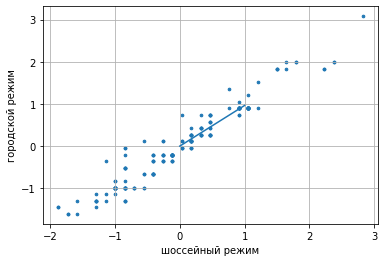

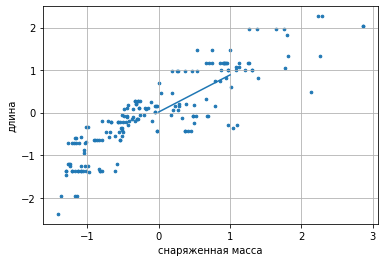

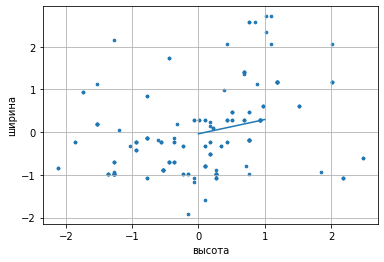

In [480]:
visualise(df2,'шоссейный режим','городской режим')
visualise(df2,'снаряженная масса','длина')
visualise(df2,'высота','ширина')

In [481]:
def jitter(limit):
    '''Генератор джиттера (произвольного сдвига точек данных)'''
    return lambda x: np.random.uniform(-limit, limit) + x

def residuals(a, b, xs, ys):
    '''Вычисление остатков'''
    estimate = regression_line(a, b)     # частичное применение
    return pd.Series( map(lambda x, y: y - estimate(x), xs, ys) )

constantly = lambda x: 0

def Lefts(df,nx,ny):
    '''Построение графика остатков на примере данных роста и веса'''
    X = df[nx].apply( jitter(0.5) )
    y = df[ny]
    a, b = intercept(X, y), slope(X, y) 
    y  = residuals(a, b, X, y)
    ax = pd.DataFrame(np.array([X, y]).T).plot.scatter(0, 1, s=12)
    s  = pd.Series(range(0,2))
    df = pd.DataFrame( {0:s, 1:s.map(constantly)} )      
    df.plot(0, 1, legend=False, grid=True, ax=ax)
    plt.xlabel(nx)
    plt.ylabel(ny)
    plt.show()

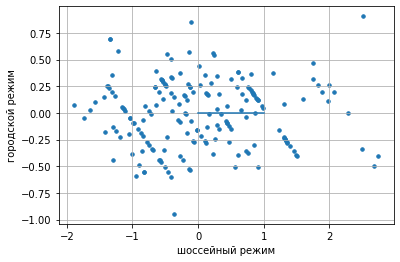

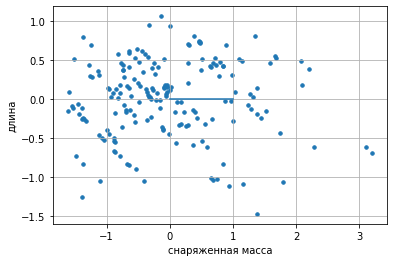

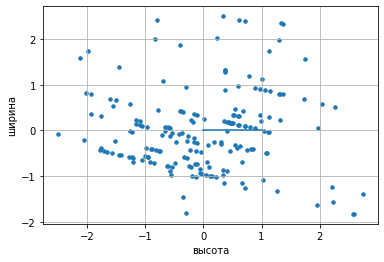

In [482]:
Lefts(df2,'шоссейный режим','городской режим')
Lefts(df2,'снаряженная масса','длина')
Lefts(df2,'высота','ширина')

In [483]:
def r_squared(a, b, xs, ys):
    '''Рассчитать коэффициент детерминации (R-квадрат)'''
    r_var = residuals(a, b, xs, ys).var() 
    y_var = ys.var()
    return 1 - (r_var / y_var)

def R_sqared(df,xs,ys):
    '''Рассчитать коэффициент R-квадрат 
       на примере данных роста и веса'''
    X  = df[xs].apply( jitter(0.5) )
    y = df[ys]
    a, b = intercept(X, y), slope(X, y)
    return r_squared(a, b, X, y)

In [484]:
print(R_sqared(df2,'шоссейный режим','городской режим'))
print(R_sqared(df2,'снаряженная масса','длина'))
print(R_sqared(df2,'высота','ширина'))

0.8698327555815746
0.677853876444168
0.10085341225269728
